# Imports

In [32]:
import re
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm
import statistics
from statsmodels.graphics import tsaplots

import pandas as pd

# Get the PDE Data

In [33]:
pde_dict = {}

# Define variables and coefficients using regular expression
pattern = re.compile(r'([-+]?\s*\d*\.\d+\s*)?(\w+)(?:_(\d+))?')

with open(r"PDE.txt", 'r') as f:
    lines = f.readlines()
    # Equation for which of the trajectories?
    for line in lines:
        if line.__contains__("20:"):
            key = '20'
        elif line.__contains__("22:"):
            key = '22'
        elif line.__contains__("24:"):
            key = '24'
        else:
            # Read equation
            if line.strip():
                matches = pattern.findall(line)
                # Write dictionary for each variable
                equation_dict = {}
                for coefficient, variable, exponent in matches:
                    coefficient = float(coefficient.replace(" ", "")) if coefficient else 1.0
                    exponent = int(exponent) if exponent else 1
                    equation_dict[variable + ('_' + exponent if exponent > 1 else '')] = [coefficient]
                if key not in pde_dict:
                    pde_dict[key] = equation_dict
                else:
                    dict1 = pde_dict[key]
                    for key_dict2, value_dict2 in equation_dict.items():
                        if key_dict2 in dict1:
                            dict1[key_dict2].extend(value_dict2)
                        else:
                            dict1[key_dict2] = value_dict2
                    pde_dict[key].update(dict1)

# Analyze Variable Value Distribution

Standard deviation of Trajectory 20, Variable u: 7.181214672571327
Mean of Trajectory 20, Variable u: 4.2690909090909095


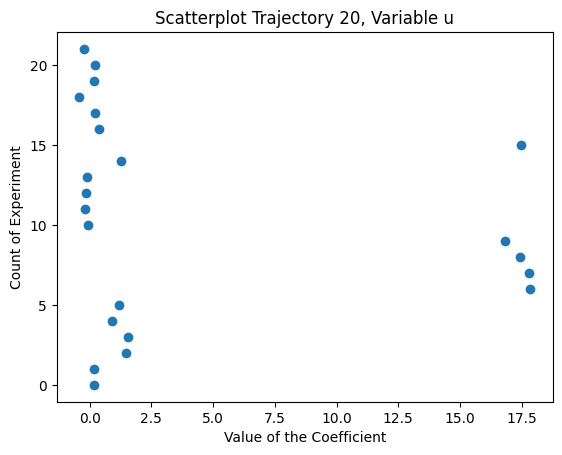

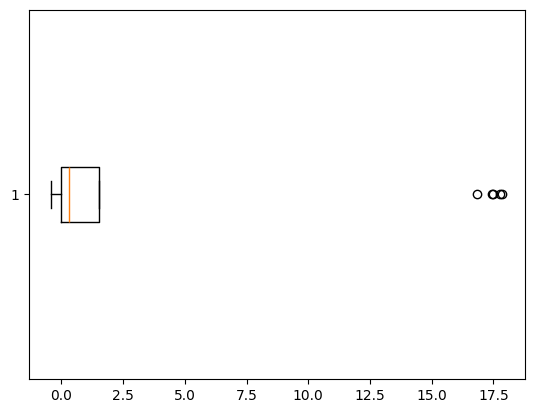

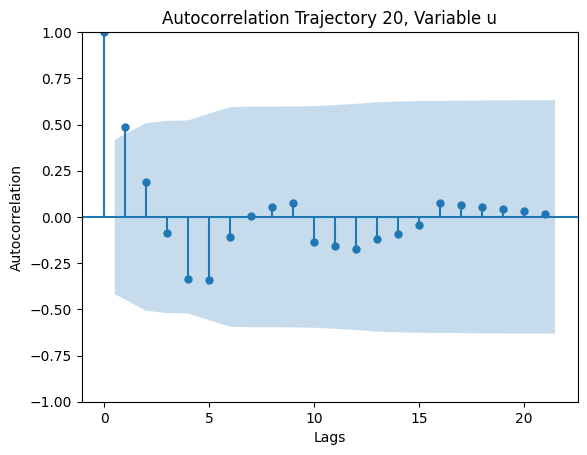

Standard deviation of Trajectory 20, Variable uu: 0.44757087254468786
Mean of Trajectory 20, Variable uu: -0.03663636363636365


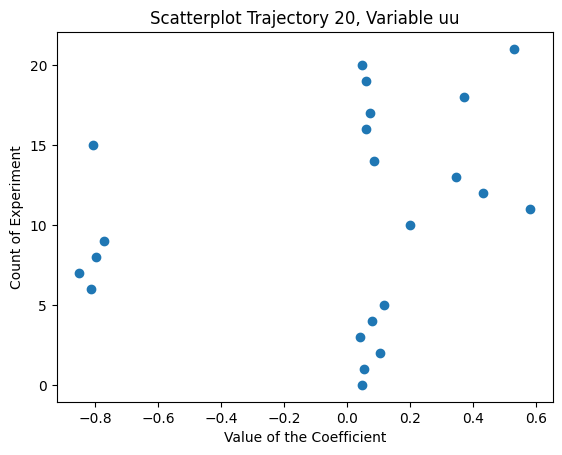

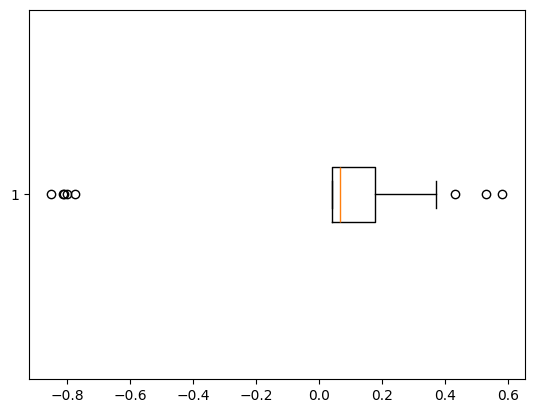

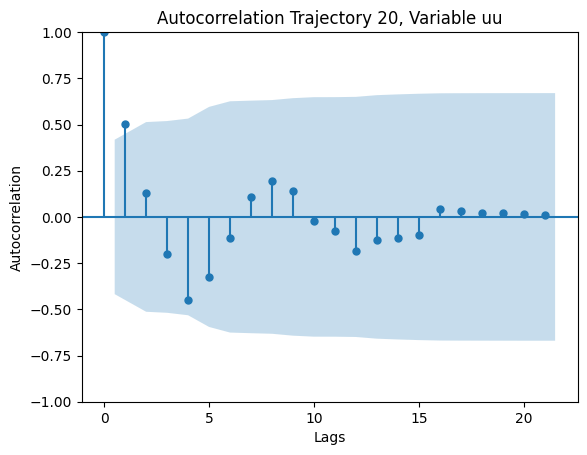

Standard deviation of Trajectory 20, Variable uuu: 0.17072615353581239
Mean of Trajectory 20, Variable uuu: -0.01823809523809524


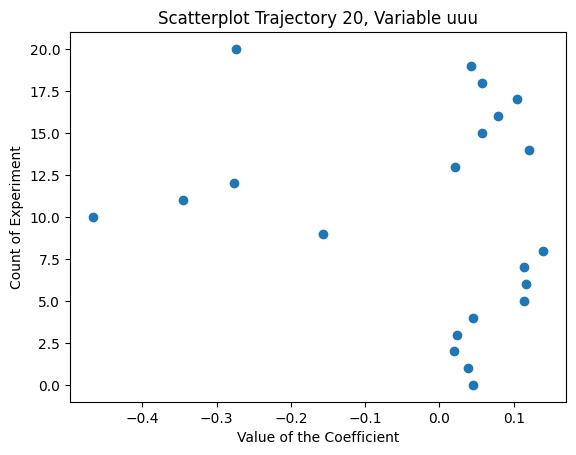

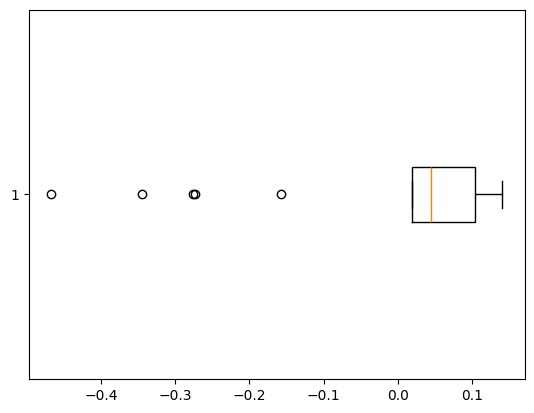

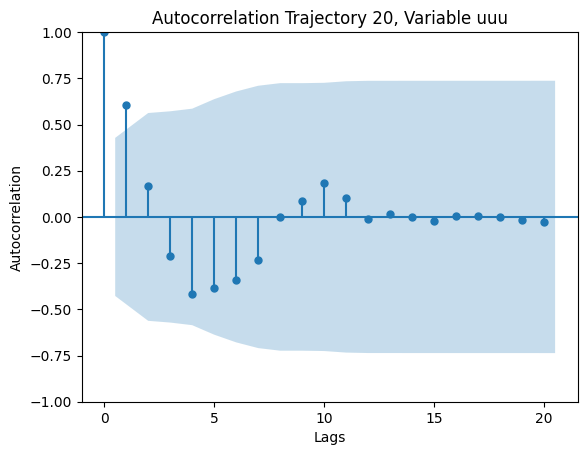

Standard deviation of Trajectory 20, Variable u_2: 0.07168313764214163
Mean of Trajectory 20, Variable u_2: 0.00016666666666666422


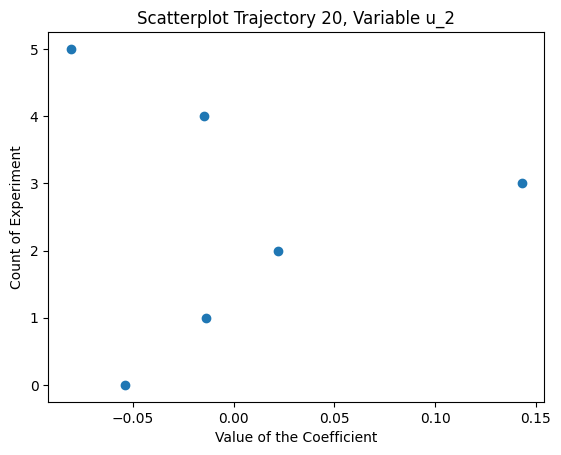

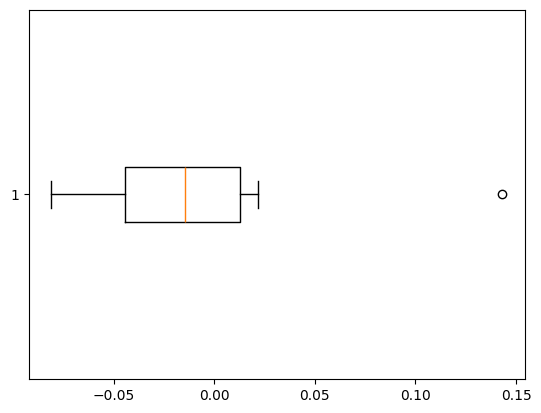

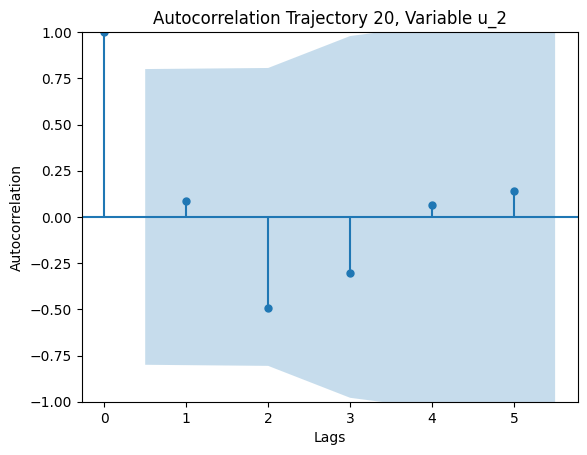

Standard deviation of Trajectory 20, Variable u_22: 0.07305643746827213
Mean of Trajectory 20, Variable u_22: 0.04158333333333333


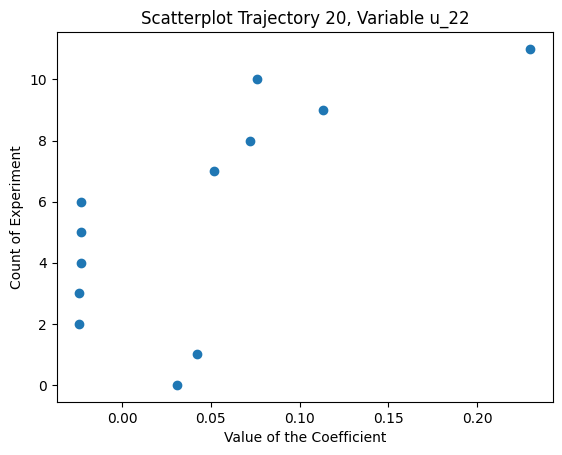

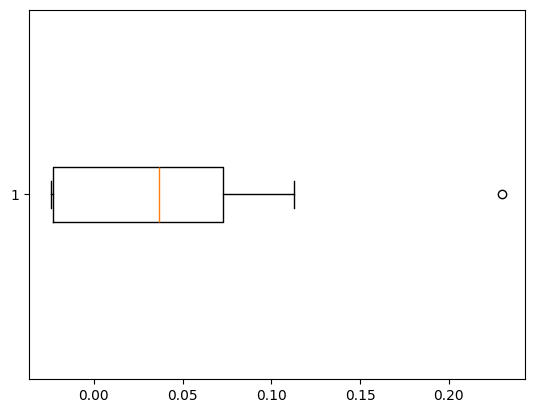

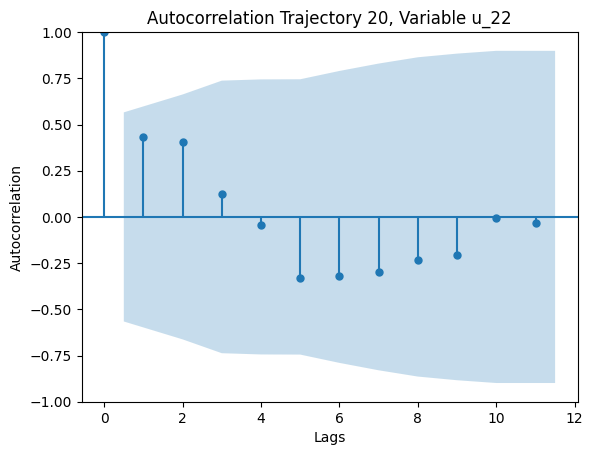

Standard deviation of Trajectory 20, Variable u_222: 0.014735633304642488
Mean of Trajectory 20, Variable u_222: 0.010166666666666668


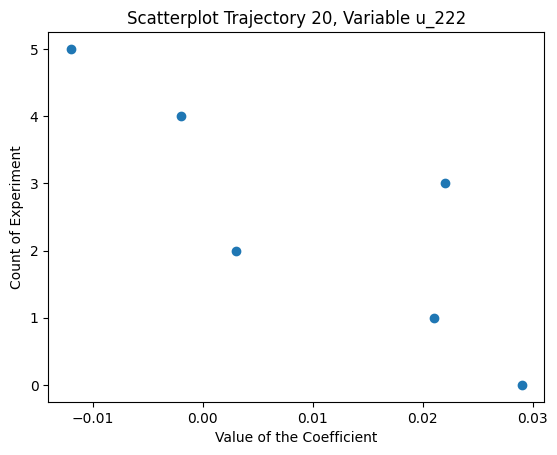

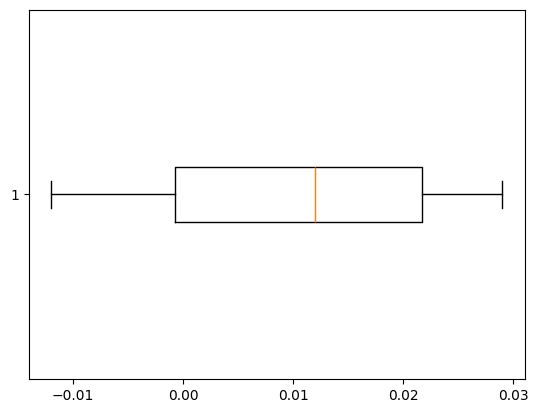

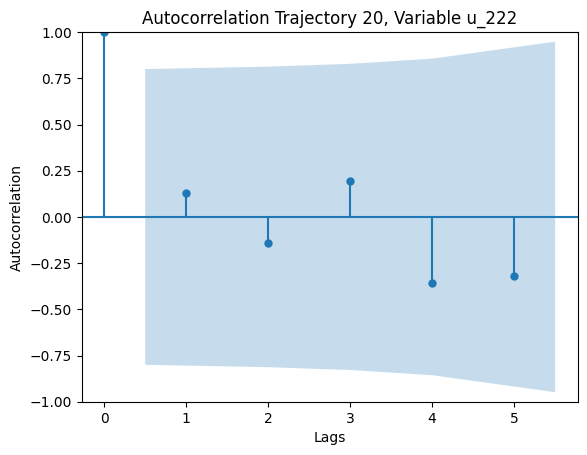

Standard deviation of Trajectory 20, Variable u_2222: 0.031027308577300423
Mean of Trajectory 20, Variable u_2222: 0.07085714285714285


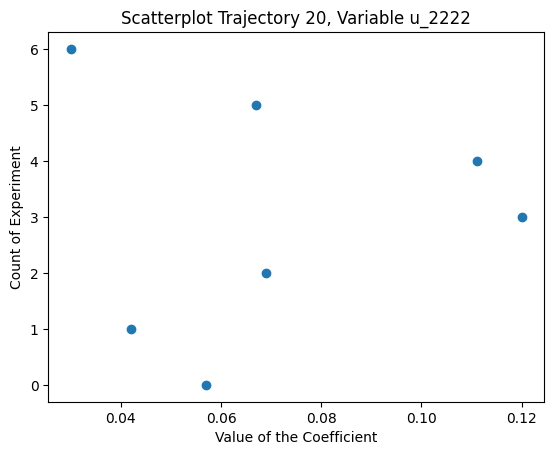

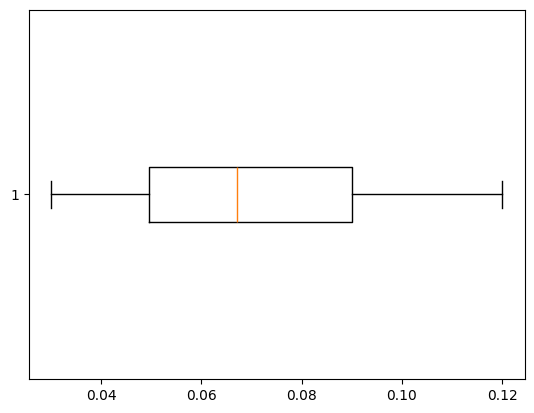

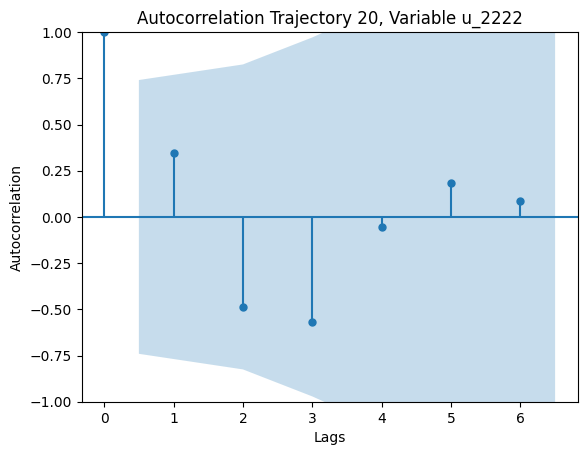

Standard deviation of Trajectory 20, Variable u_1: 0.0818387642461281
Mean of Trajectory 20, Variable u_1: -0.0005000000000000022


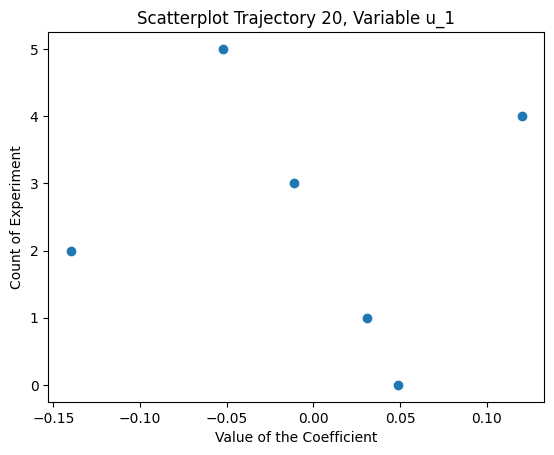

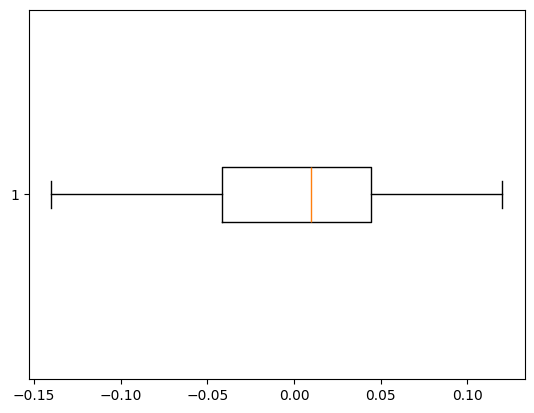

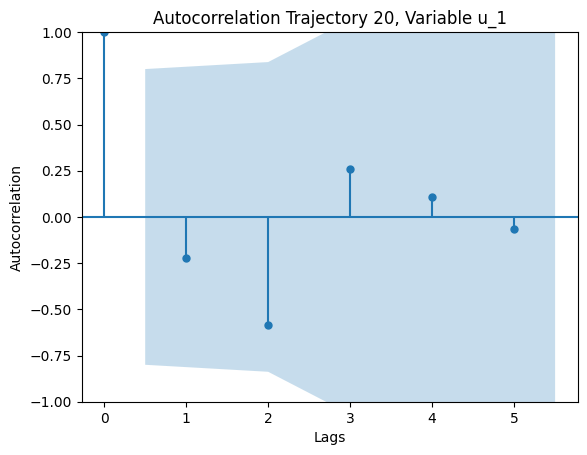

Standard deviation of Trajectory 20, Variable u_12: 0.03592005011132362
Mean of Trajectory 20, Variable u_12: -0.0055000000000000005


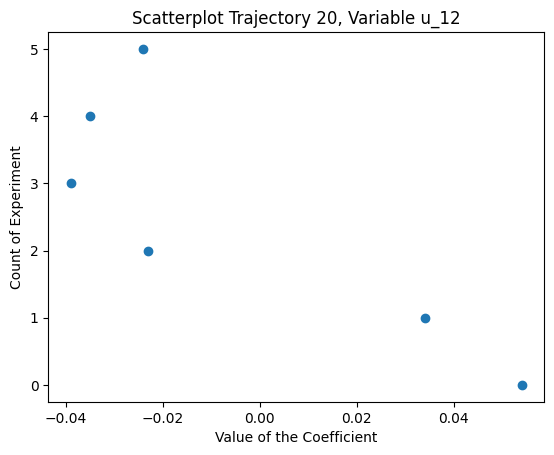

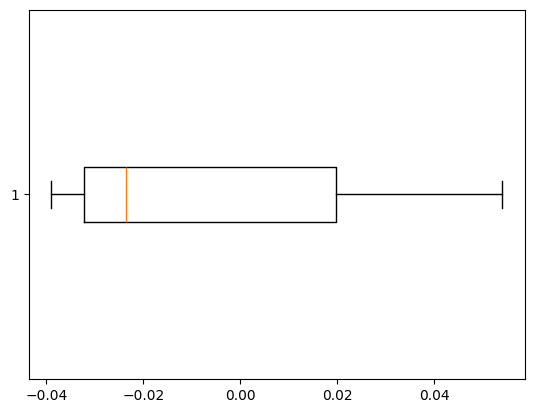

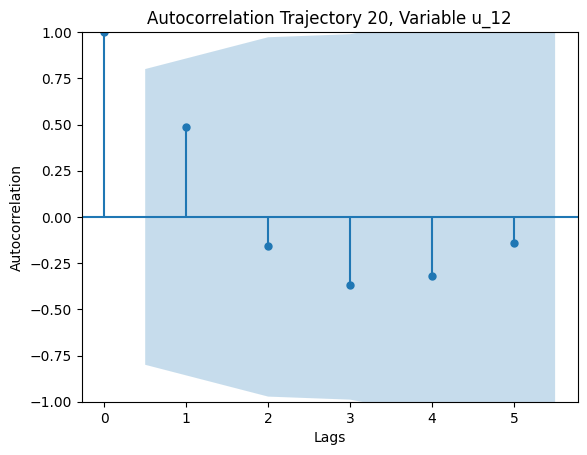

Standard deviation of Trajectory 20, Variable u_122: 0.018732028424302823
Mean of Trajectory 20, Variable u_122: 0.011333333333333334


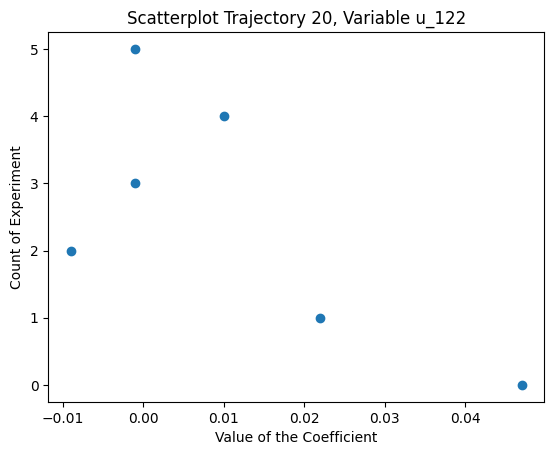

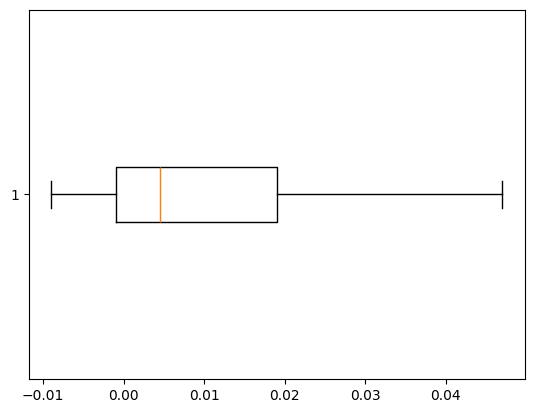

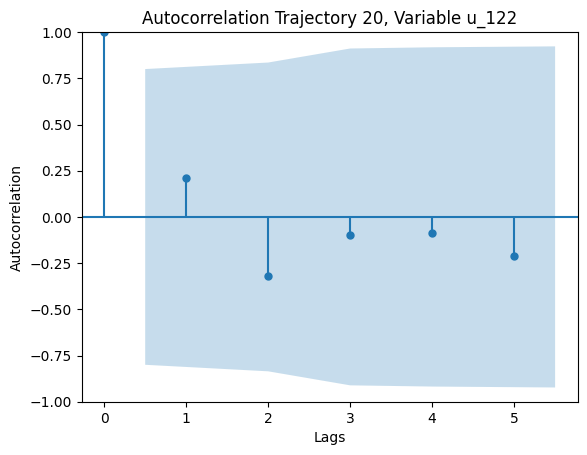

Standard deviation of Trajectory 20, Variable u_1222: 0.03168946547706701
Mean of Trajectory 20, Variable u_1222: 0.019666666666666666


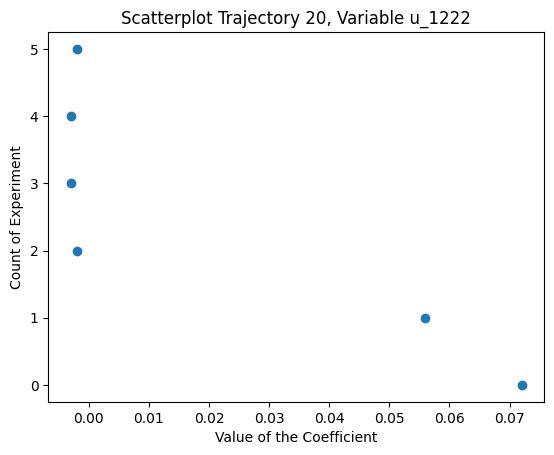

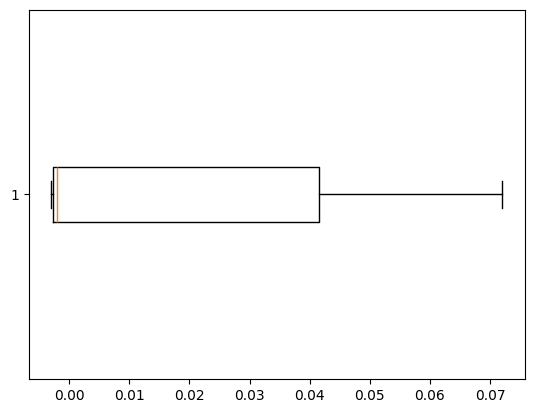

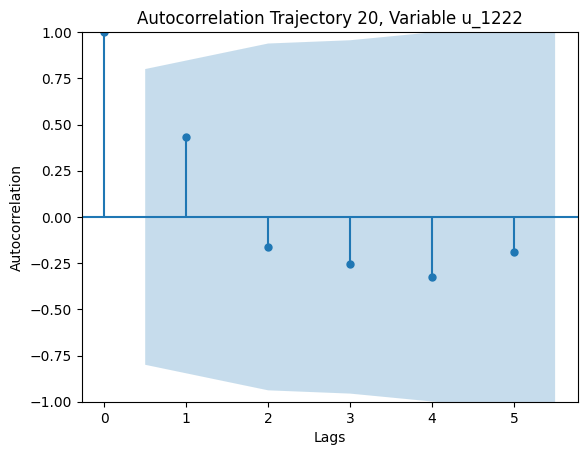

Standard deviation of Trajectory 20, Variable u_11: 0.071803442640308
Mean of Trajectory 20, Variable u_11: 0.044875000000000005


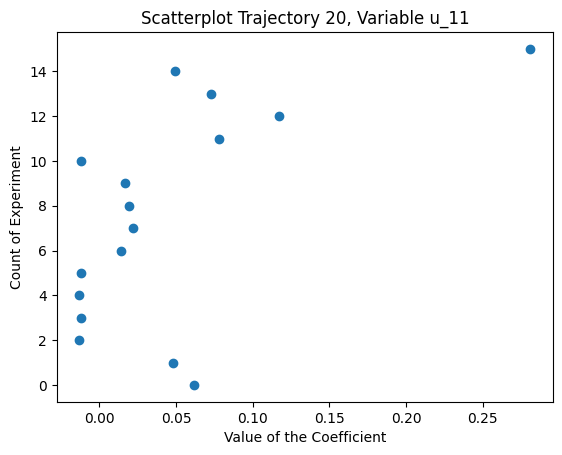

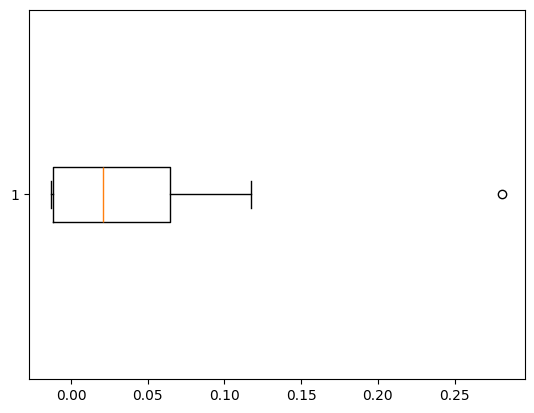

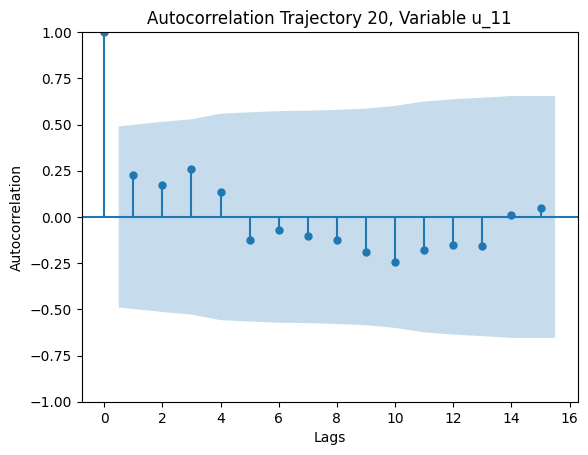

Standard deviation of Trajectory 20, Variable u_112: 0.02450453472772381
Mean of Trajectory 20, Variable u_112: 0.018166666666666668


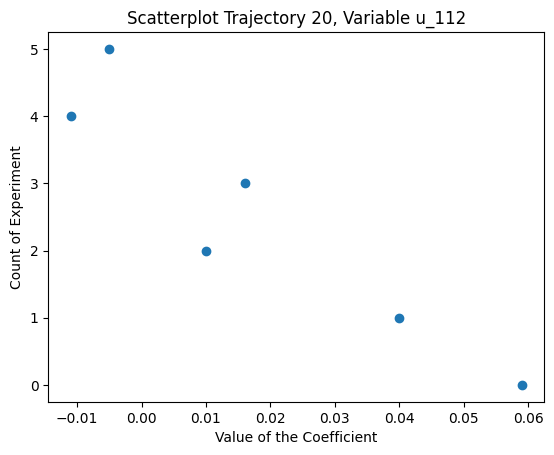

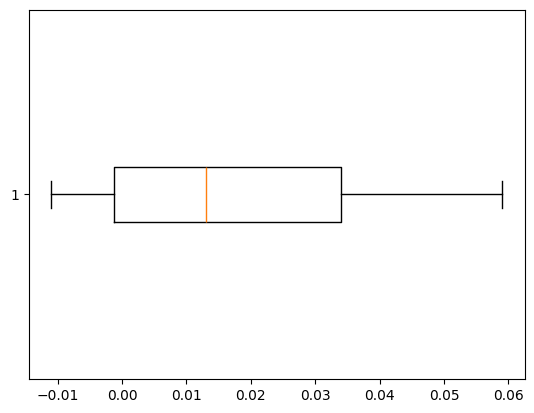

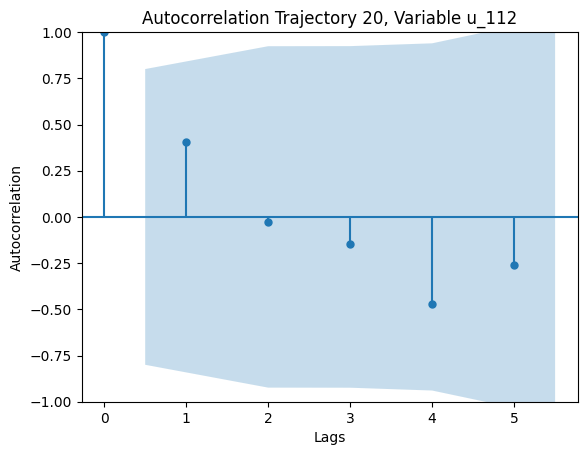

Standard deviation of Trajectory 20, Variable u_1122: 0.02600267080299424
Mean of Trajectory 20, Variable u_1122: 0.059166666666666666


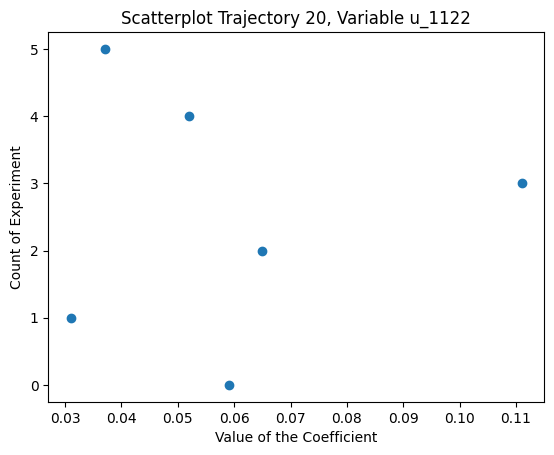

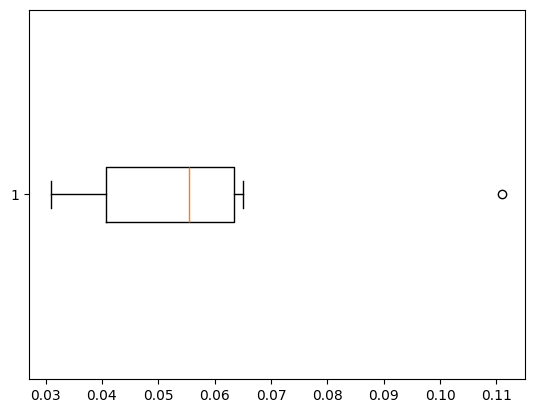

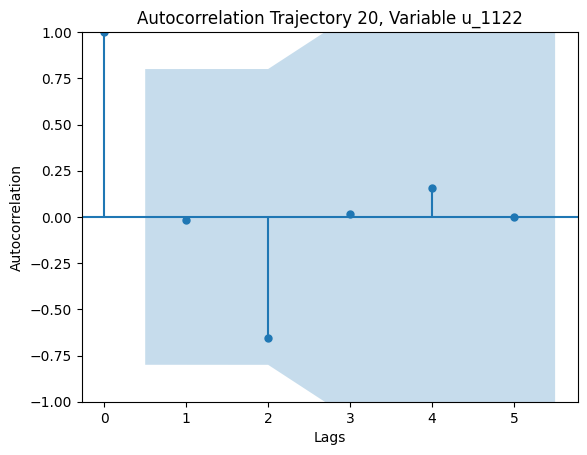

Standard deviation of Trajectory 20, Variable u_111: 0.03444520608476921
Mean of Trajectory 20, Variable u_111: 0.018833333333333334


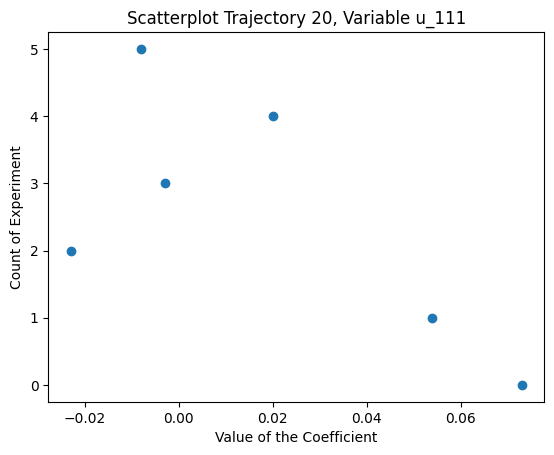

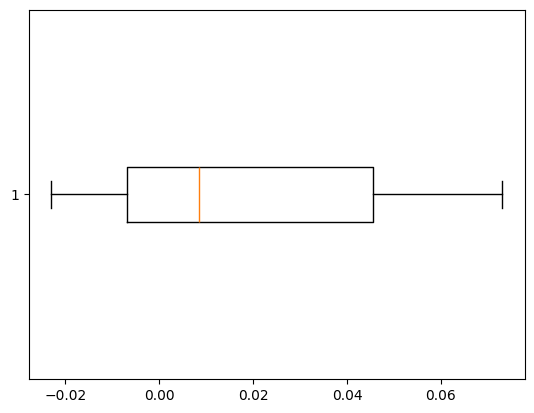

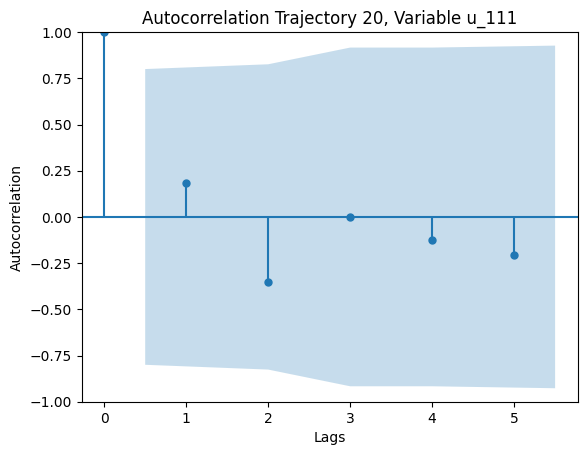

Standard deviation of Trajectory 20, Variable u_1112: 0.02997220935021864
Mean of Trajectory 20, Variable u_1112: 0.018000000000000002


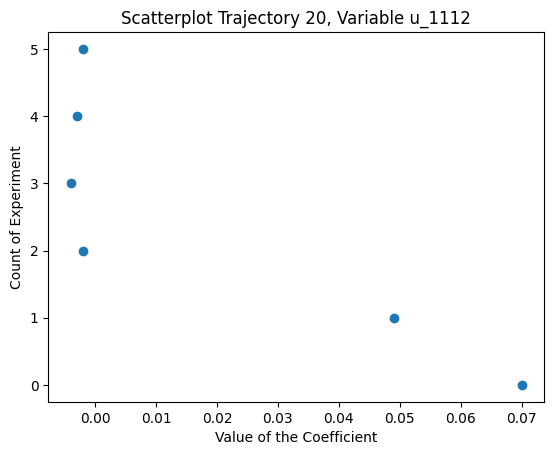

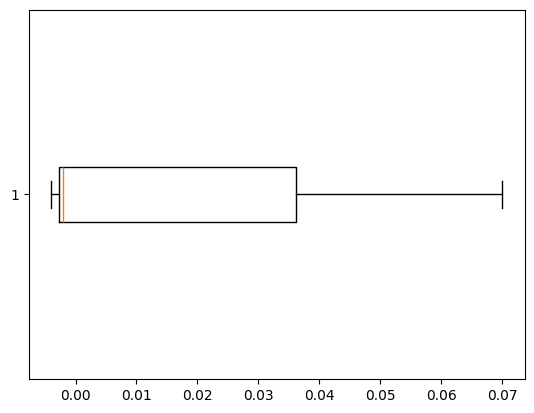

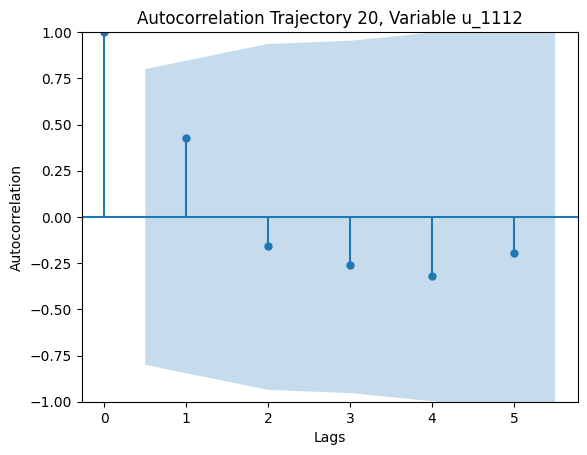

Standard deviation of Trajectory 20, Variable u_1111: 0.038844891811340015
Mean of Trajectory 20, Variable u_1111: 0.04672727272727273


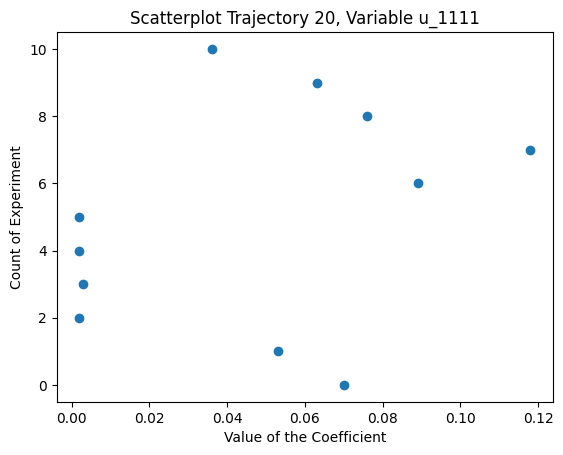

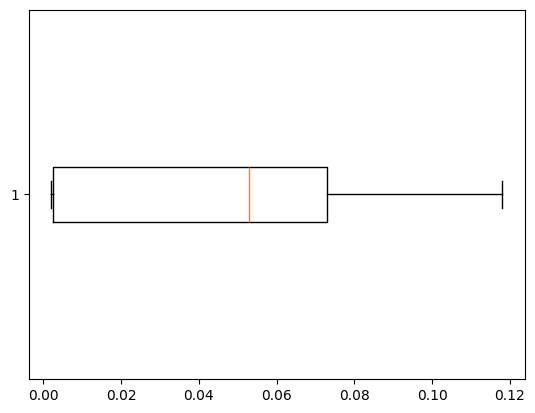

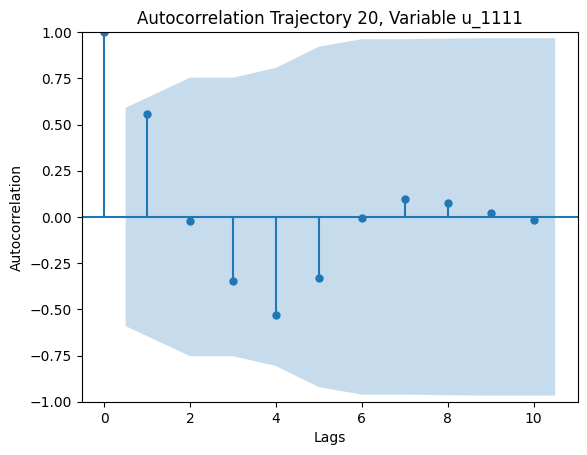

Standard deviation of Trajectory 22, Variable u: 0.26480773081147135
Mean of Trajectory 22, Variable u: 0.29204545454545455


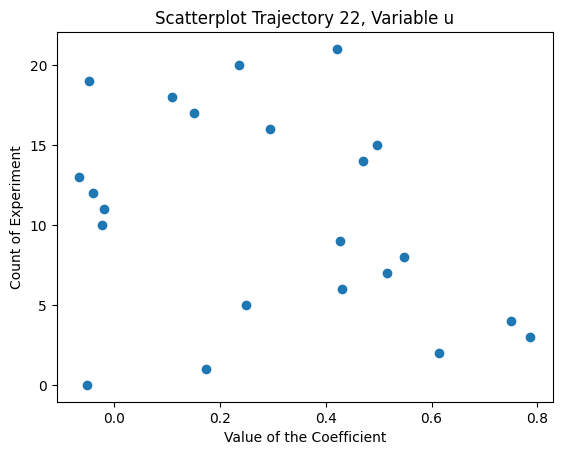

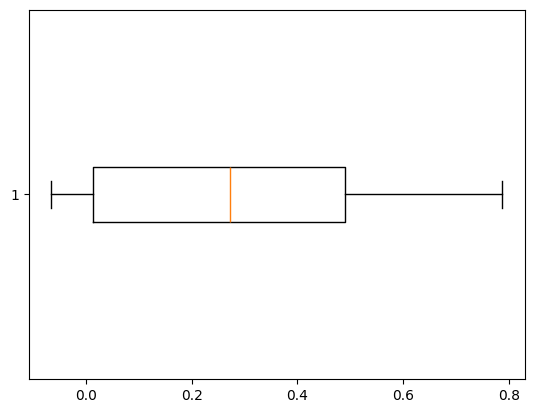

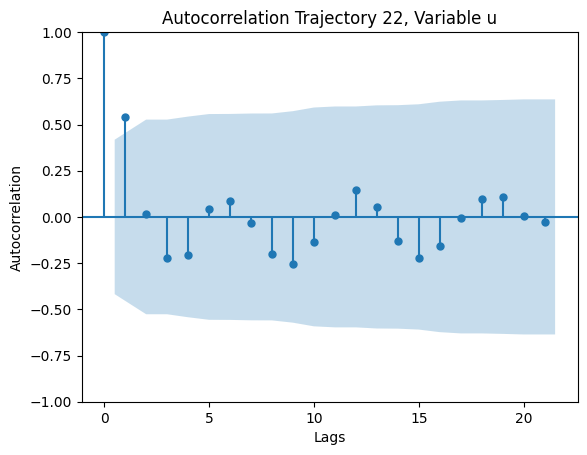

Standard deviation of Trajectory 22, Variable uu: 0.3301602290699232
Mean of Trajectory 22, Variable uu: 0.08763636363636364


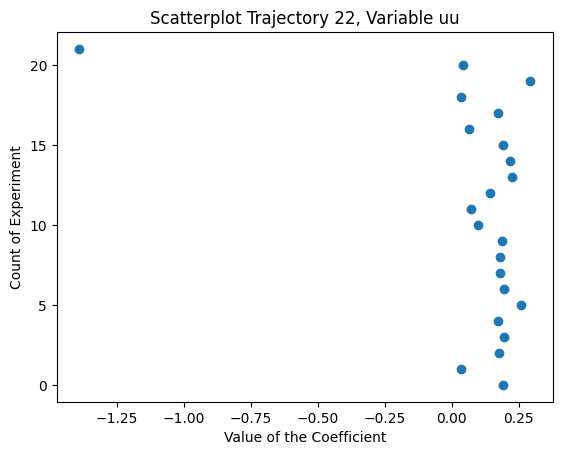

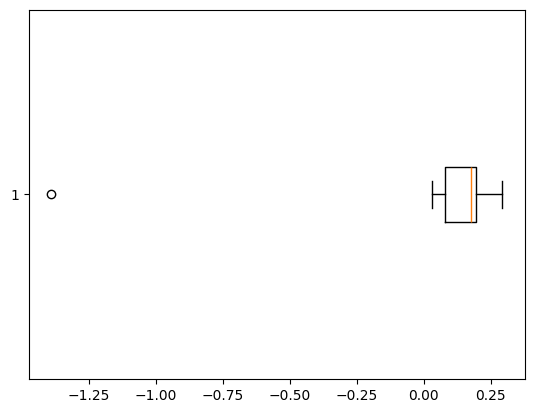

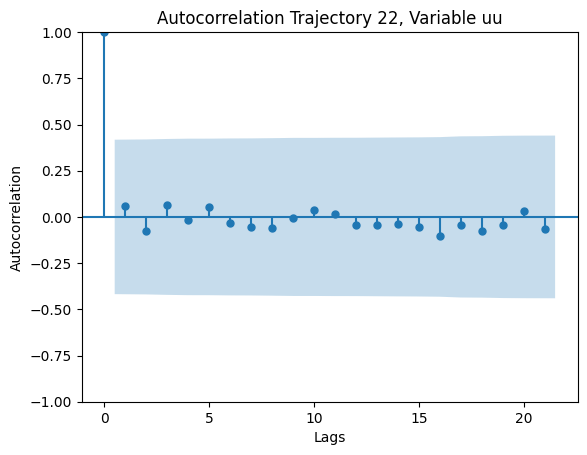

Standard deviation of Trajectory 22, Variable uuu: 0.2637575168249445
Mean of Trajectory 22, Variable uuu: -0.04117647058823529


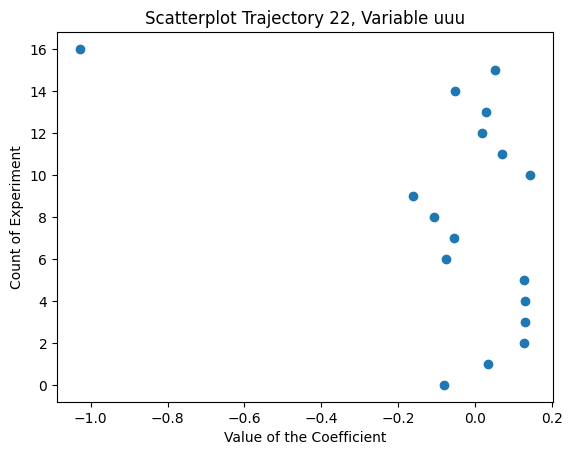

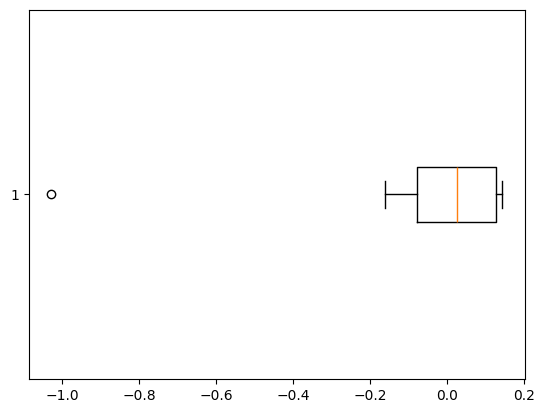

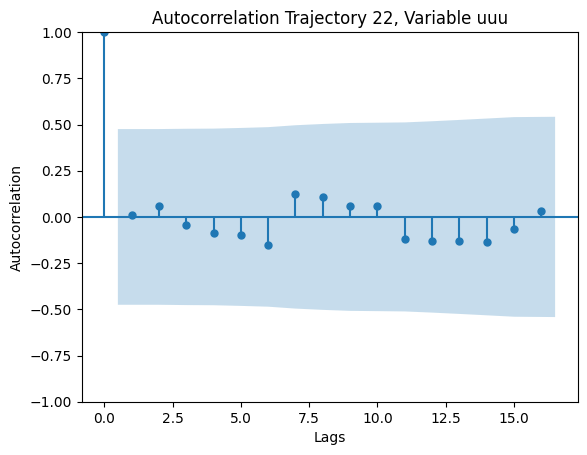

Standard deviation of Trajectory 22, Variable u_2: 0.012243762584361974
Mean of Trajectory 22, Variable u_2: 0.03158333333333333


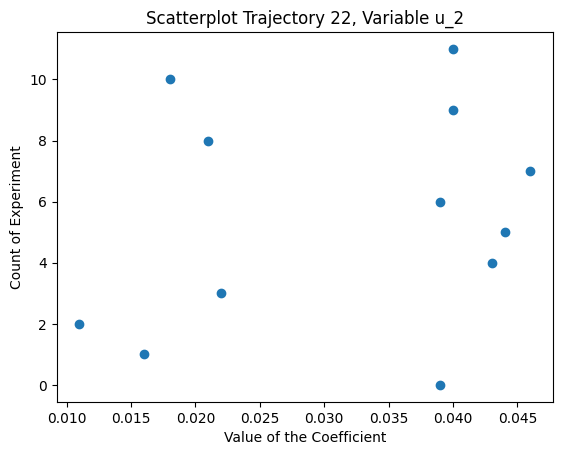

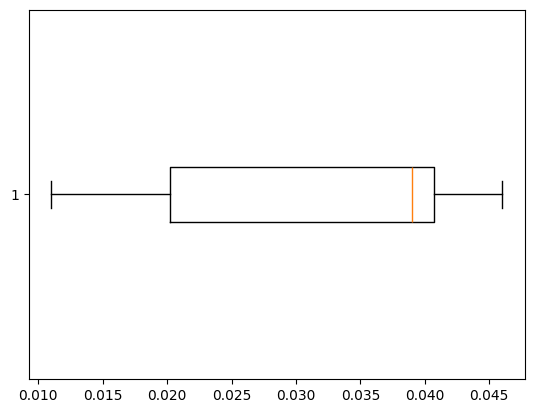

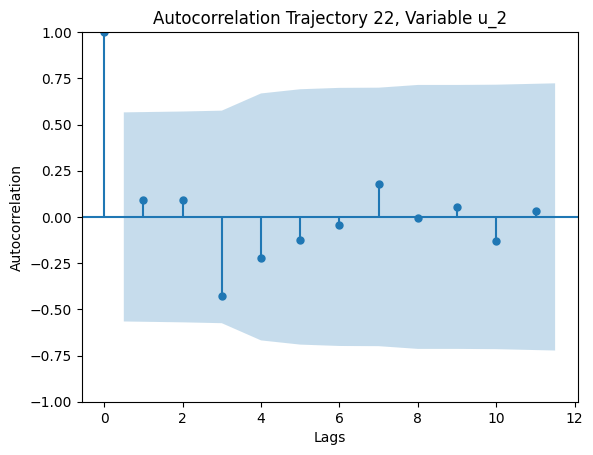

Standard deviation of Trajectory 22, Variable u_22: 0.03174807080753097
Mean of Trajectory 22, Variable u_22: 0.053399999999999996


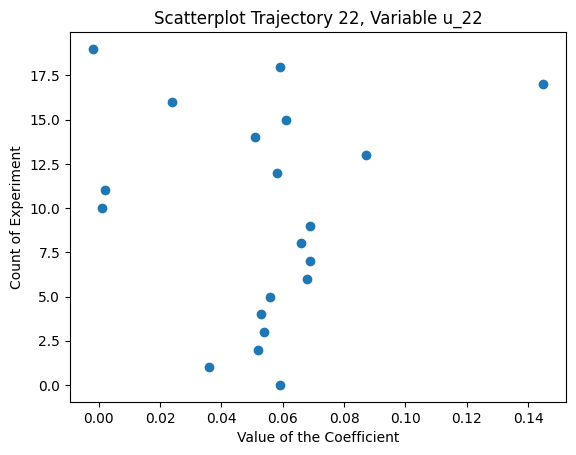

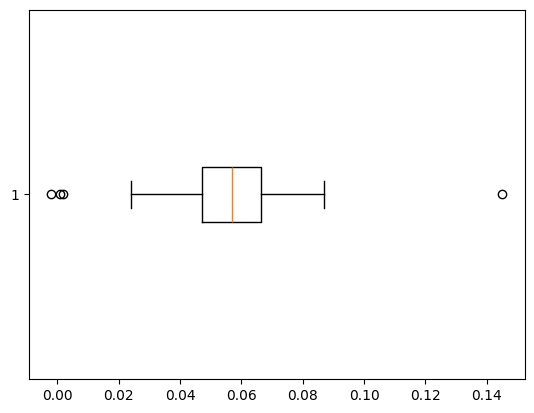

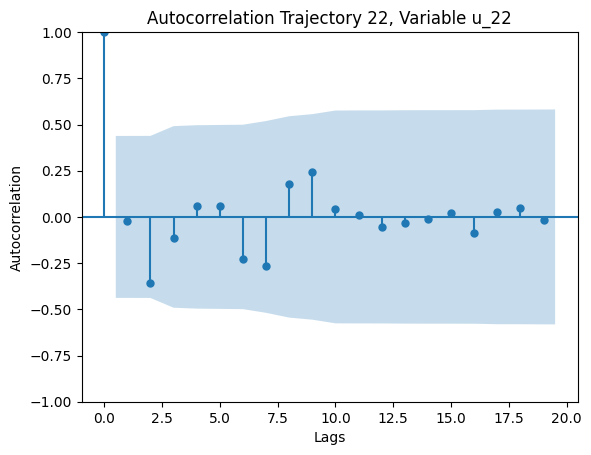

Standard deviation of Trajectory 22, Variable u_222: 0.02428753378835861
Mean of Trajectory 22, Variable u_222: 0.030545454545454546


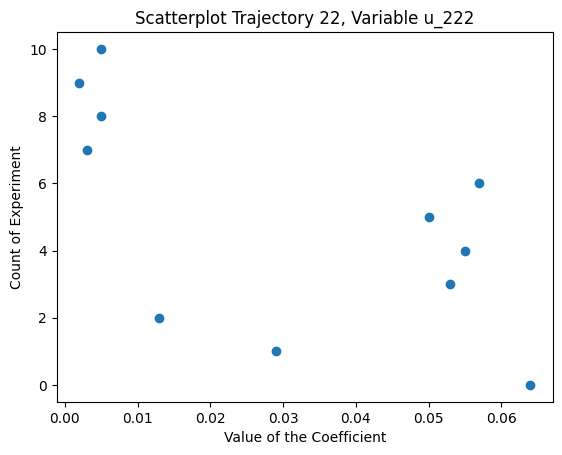

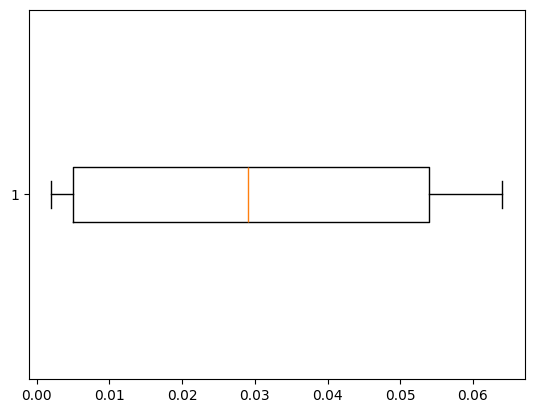

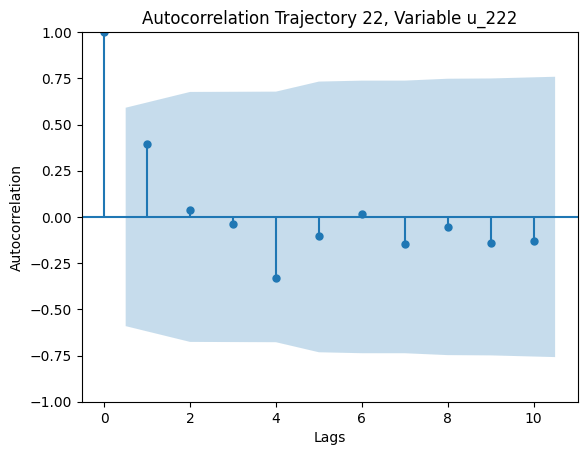

Standard deviation of Trajectory 22, Variable u_2222: 0.03528652559956688
Mean of Trajectory 22, Variable u_2222: 0.059833333333333336


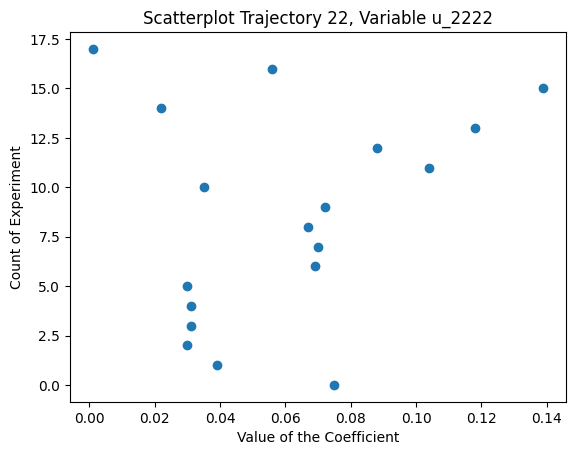

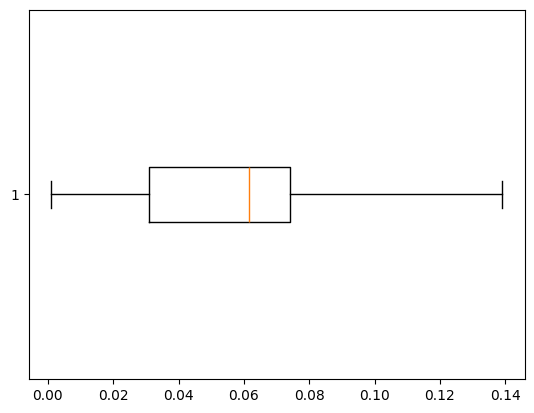

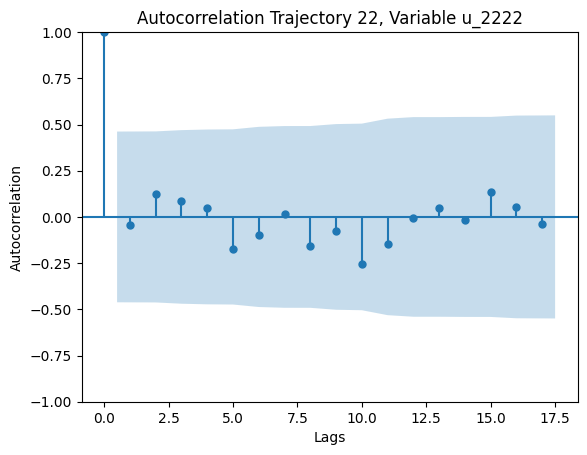

Standard deviation of Trajectory 22, Variable u_1: 0.04540308359572068
Mean of Trajectory 22, Variable u_1: 0.0254


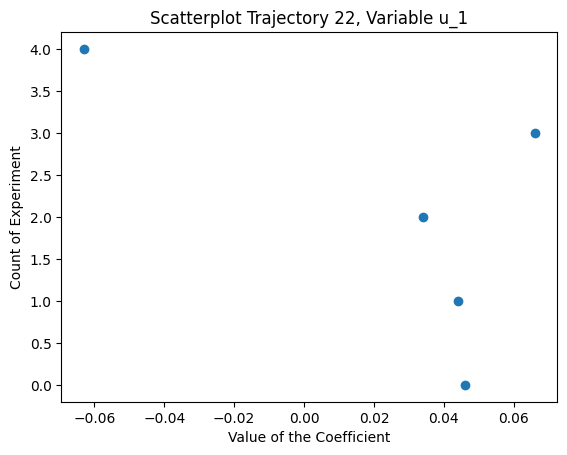

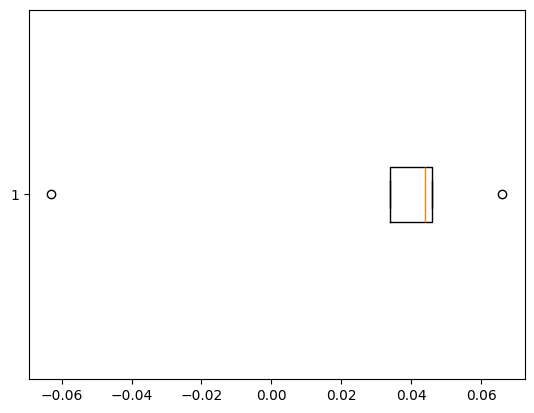

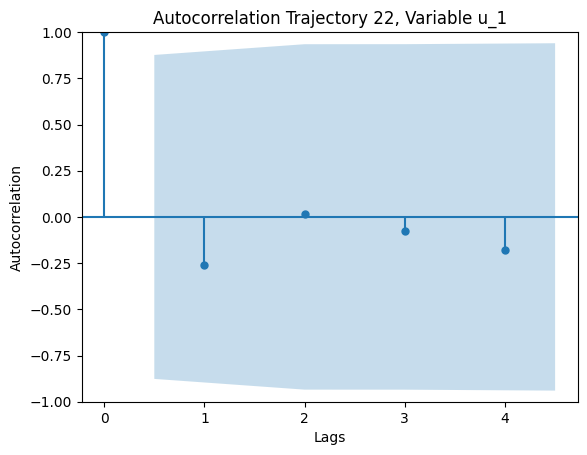

Standard deviation of Trajectory 22, Variable u_12: 0.011
Mean of Trajectory 22, Variable u_12: 0.044


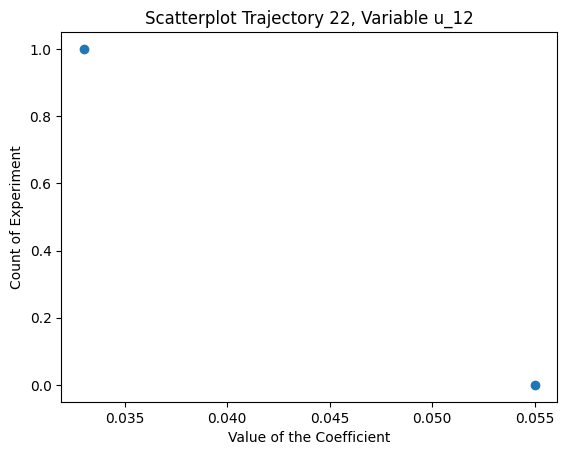

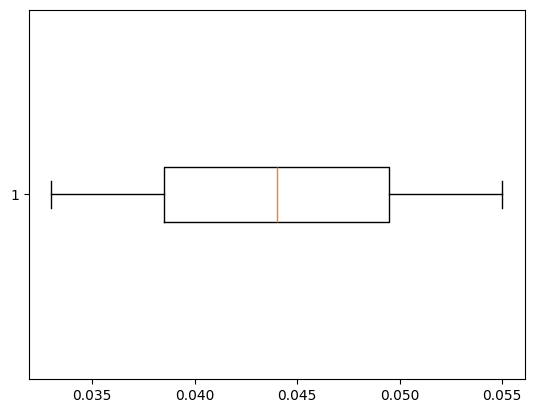

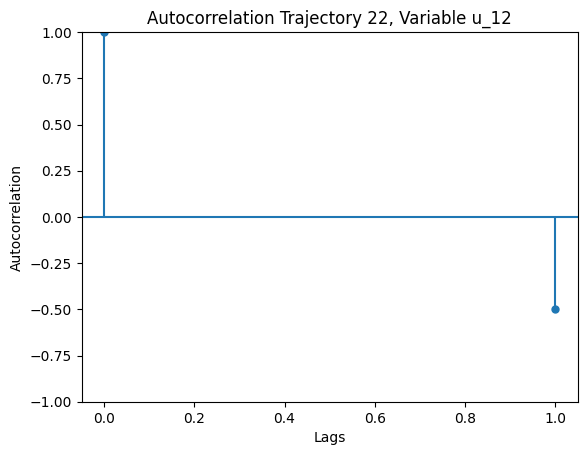

Standard deviation of Trajectory 22, Variable u_122: 0.0189208879284245
Mean of Trajectory 22, Variable u_122: 0.015


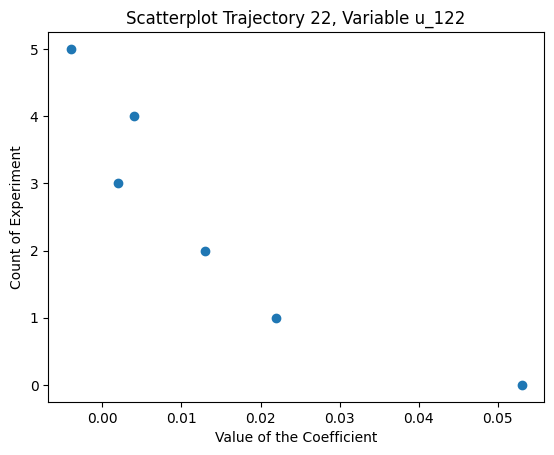

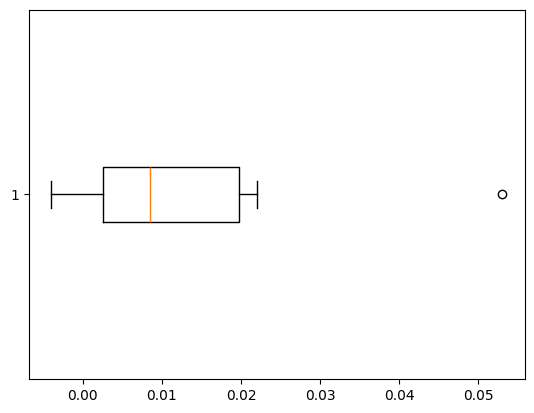

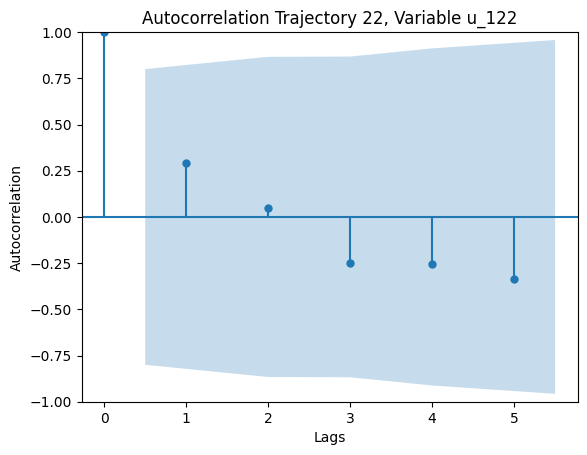

Standard deviation of Trajectory 22, Variable u_1222: 0.022022715545545243
Mean of Trajectory 22, Variable u_1222: 0.031


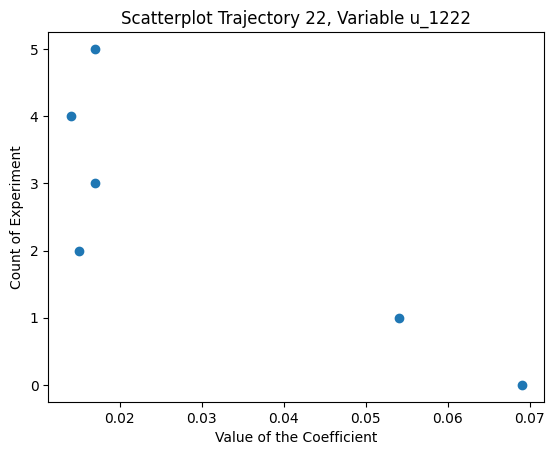

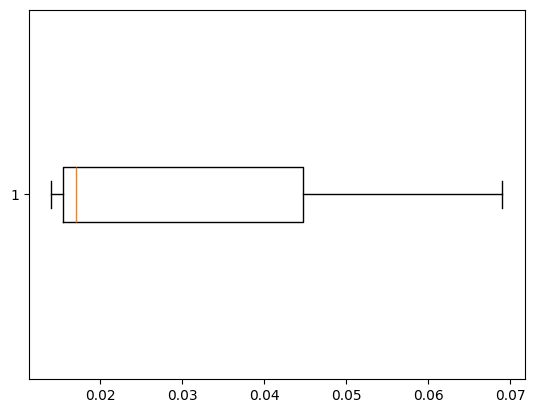

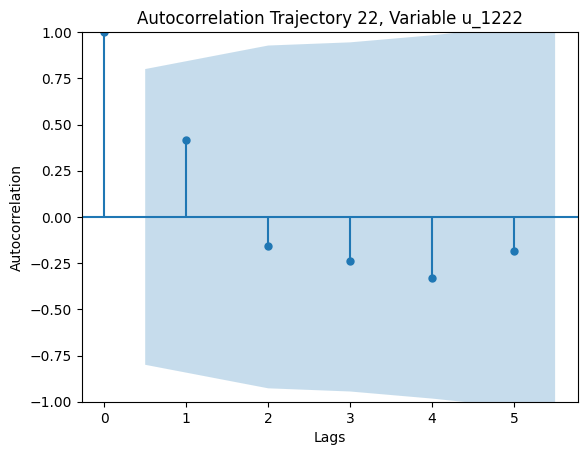

Standard deviation of Trajectory 22, Variable u_11: 0.03741621751771995
Mean of Trajectory 22, Variable u_11: 0.0616


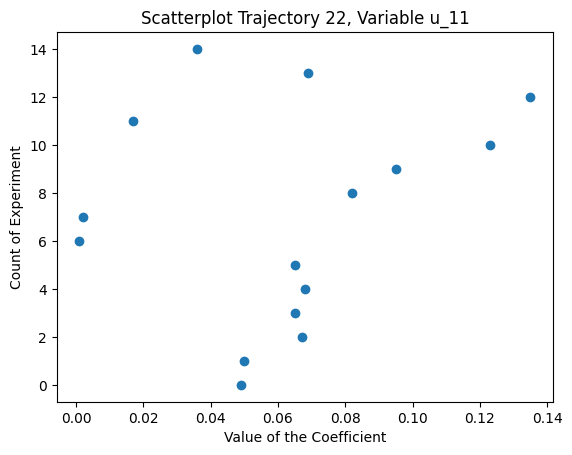

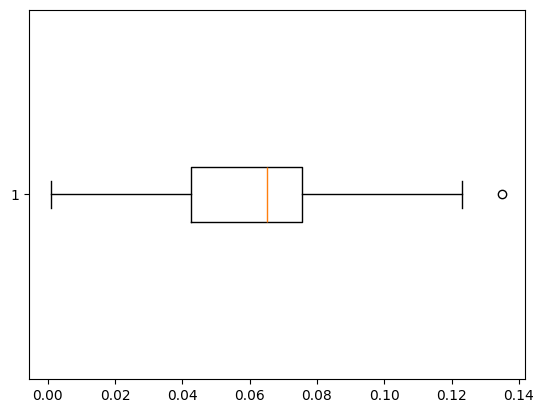

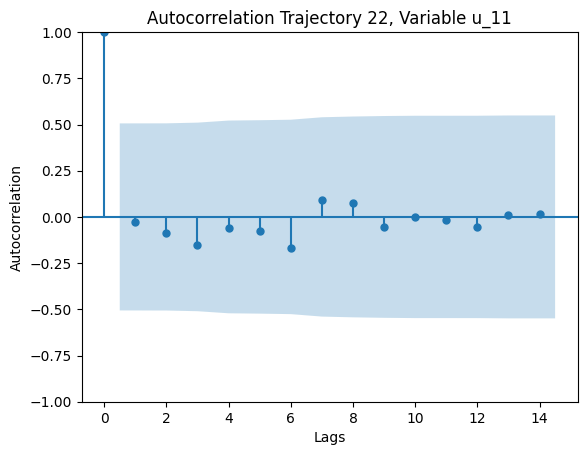

Standard deviation of Trajectory 22, Variable u_112: 0.0189971050426111
Mean of Trajectory 22, Variable u_112: 0.0199


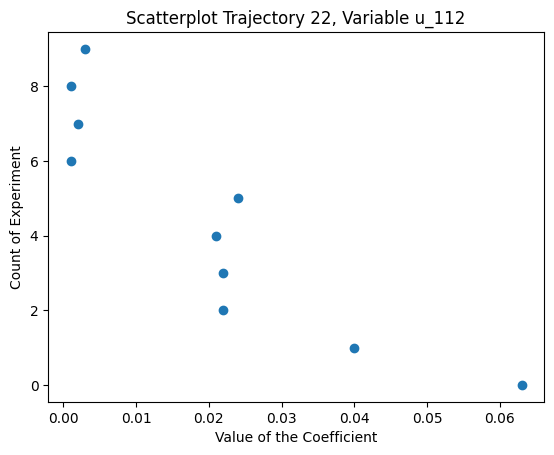

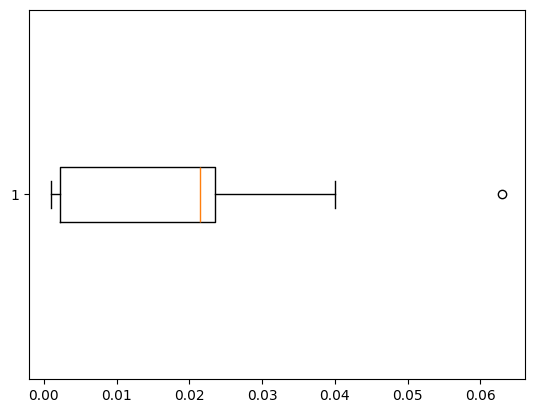

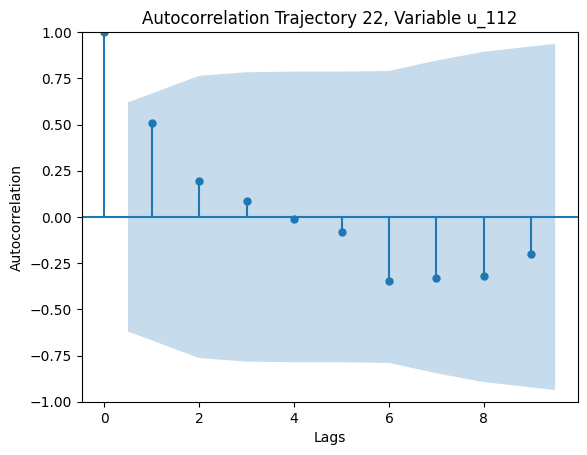

Standard deviation of Trajectory 22, Variable u_1122: 0.033512714614252405
Mean of Trajectory 22, Variable u_1122: 0.07057142857142858


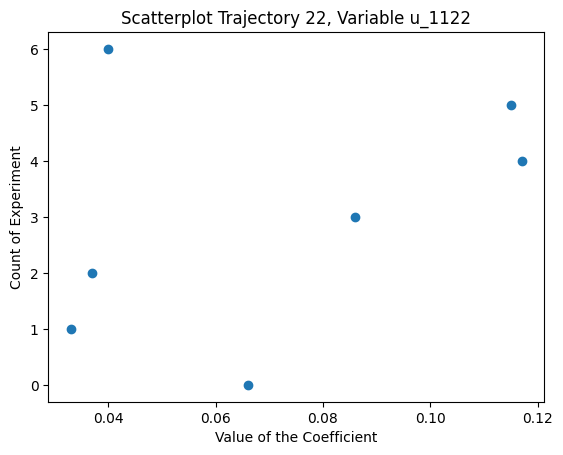

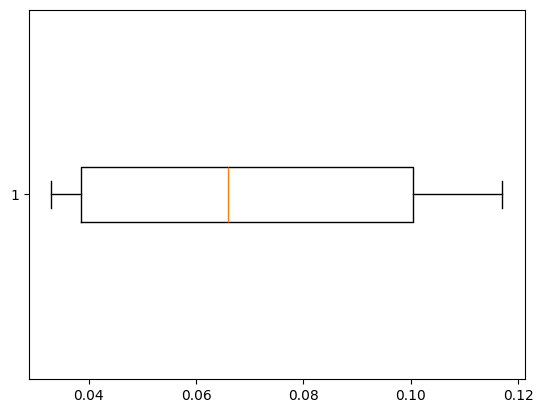

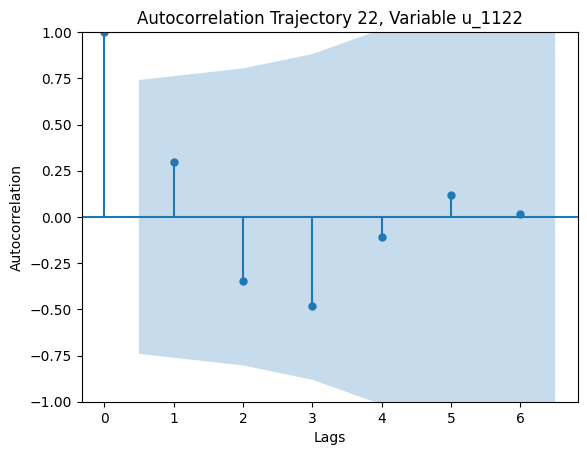

Standard deviation of Trajectory 22, Variable u_111: 0.02217160902852069
Mean of Trajectory 22, Variable u_111: 0.020555555555555556


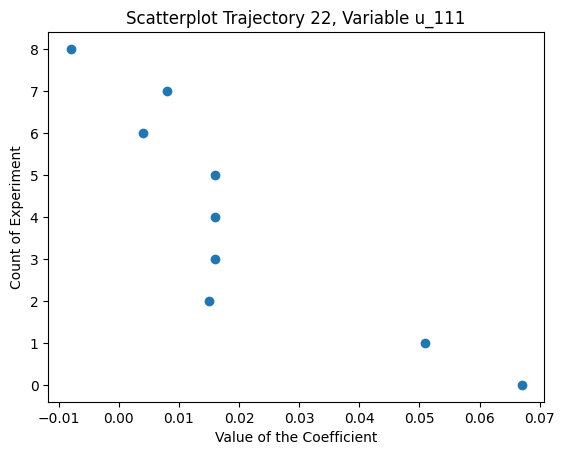

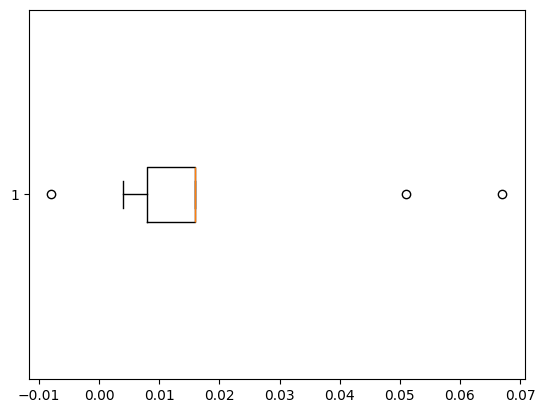

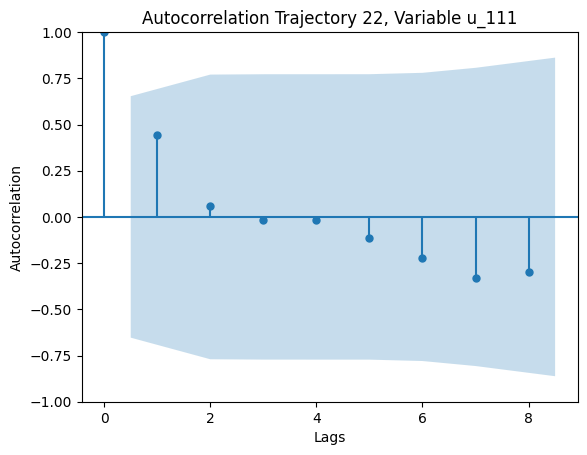

Standard deviation of Trajectory 22, Variable u_1112: 0.021491600426419826
Mean of Trajectory 22, Variable u_1112: 0.030333333333333334


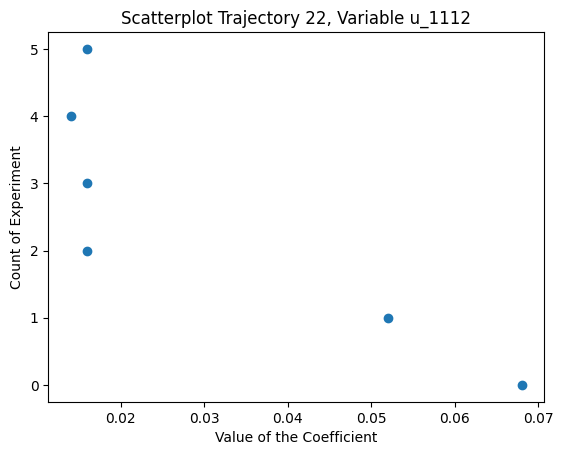

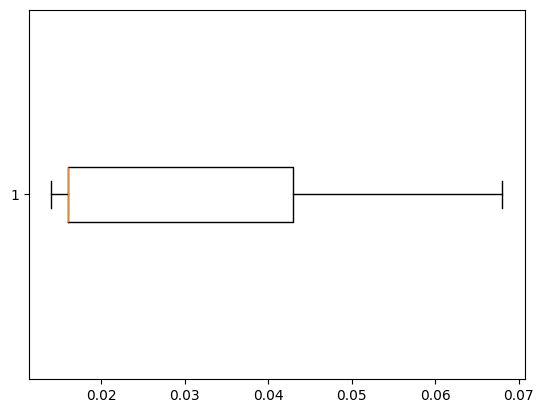

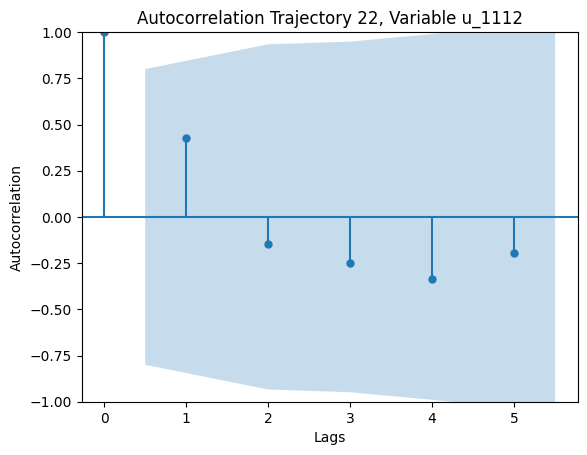

Standard deviation of Trajectory 22, Variable u_1111: 0.03978299122153266
Mean of Trajectory 22, Variable u_1111: 0.051923076923076926


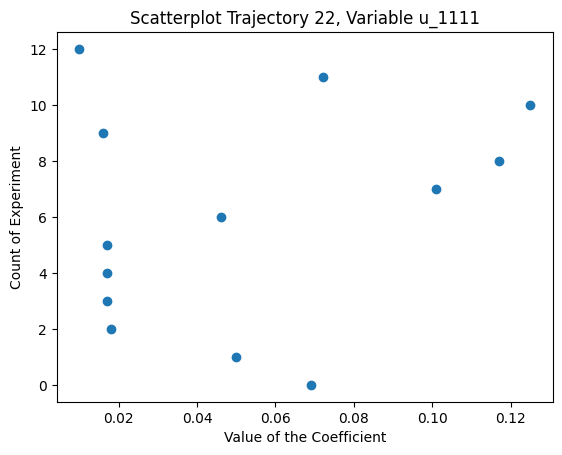

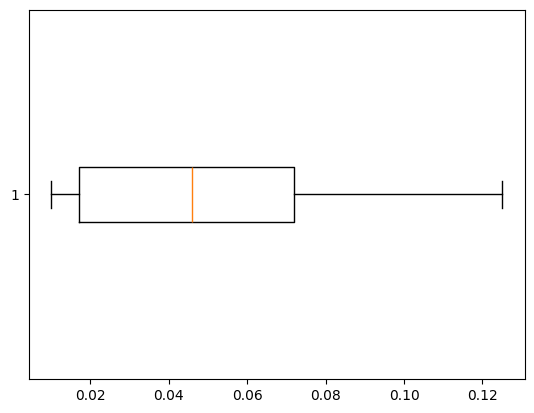

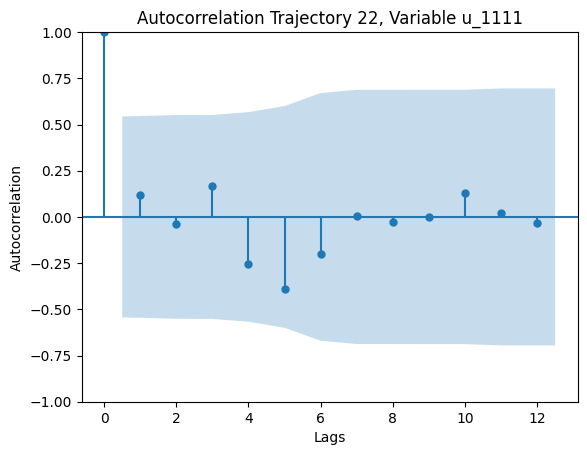

Standard deviation of Trajectory 24, Variable u: 0.1018202211646416
Mean of Trajectory 24, Variable u: 0.14022727272727273


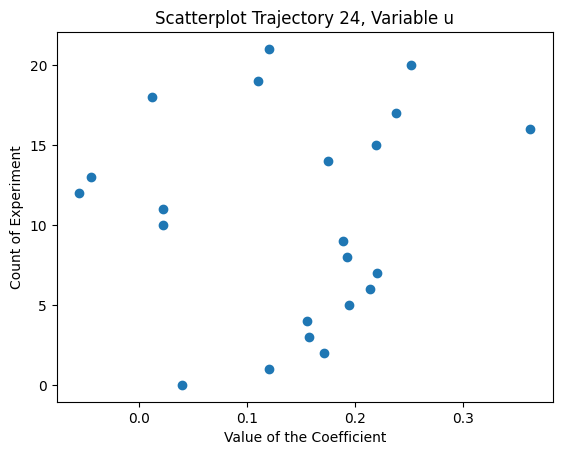

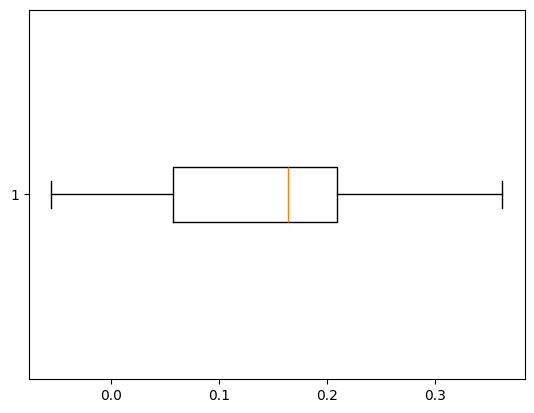

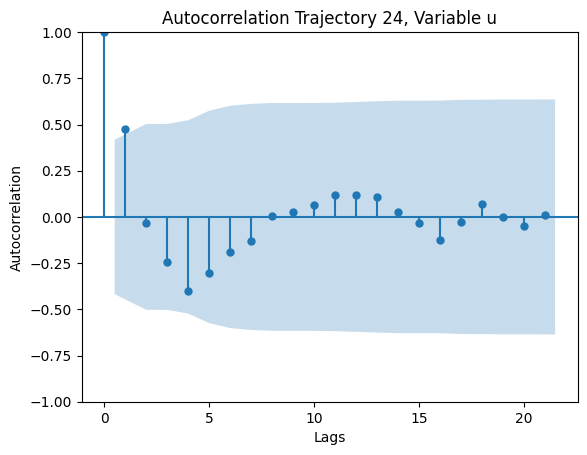

Standard deviation of Trajectory 24, Variable uu: 0.159811077771575
Mean of Trajectory 24, Variable uu: 0.1343181818181818


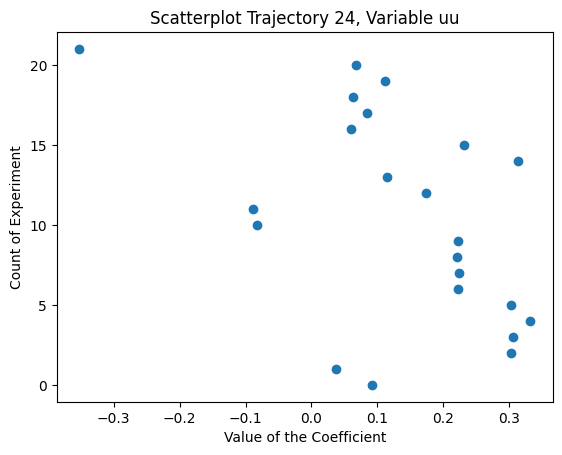

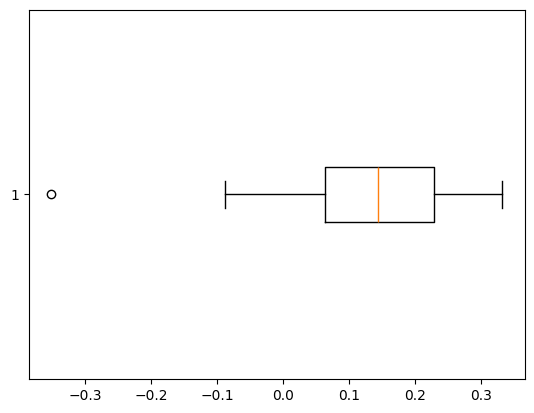

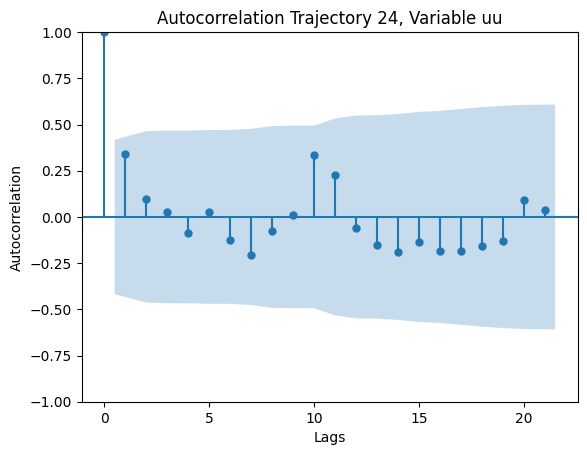

Standard deviation of Trajectory 24, Variable u_22: 0.06858361255691728
Mean of Trajectory 24, Variable u_22: 0.051157894736842104


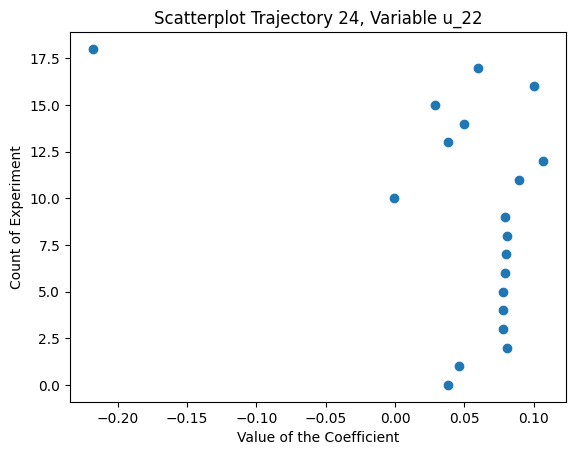

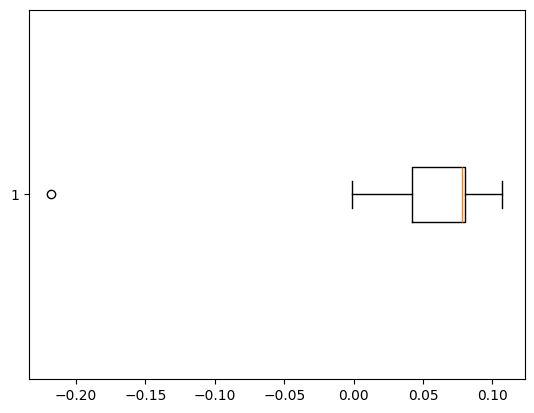

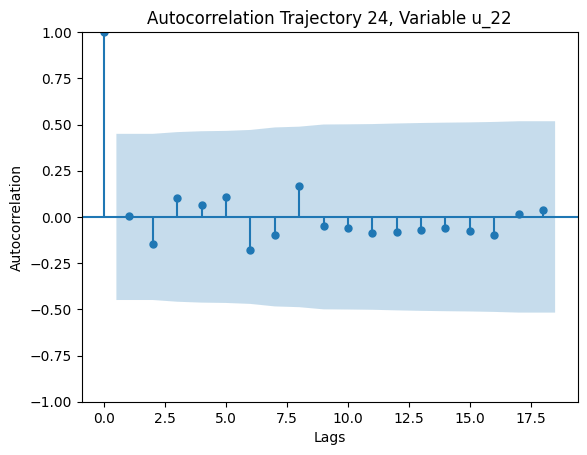

Standard deviation of Trajectory 24, Variable u_222: 0.022396359944765805
Mean of Trajectory 24, Variable u_222: 0.038214285714285715


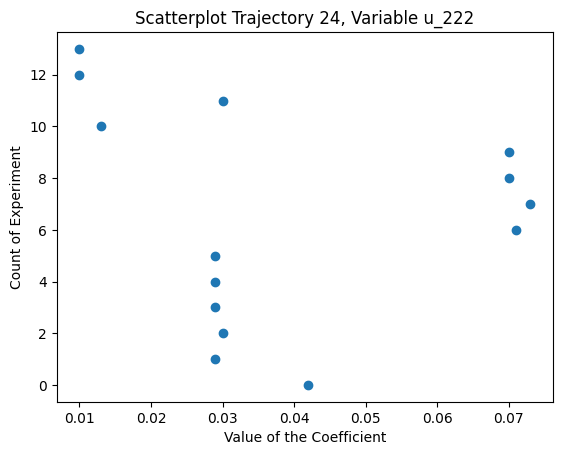

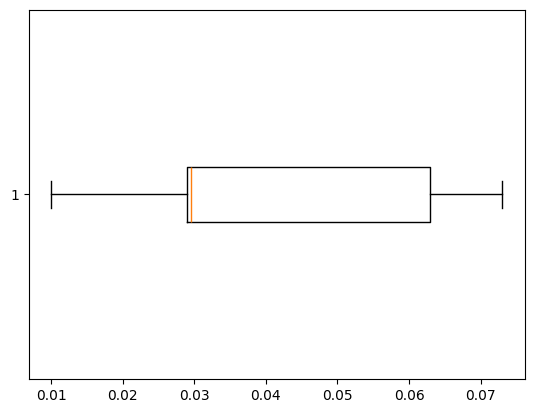

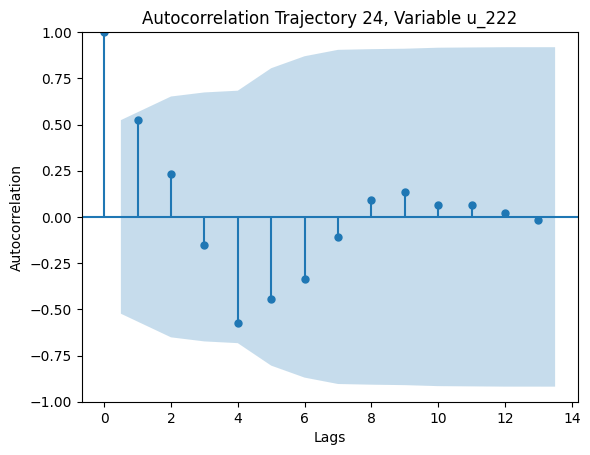

Standard deviation of Trajectory 24, Variable u_2222: 0.04784117241224109
Mean of Trajectory 24, Variable u_2222: 0.059333333333333335


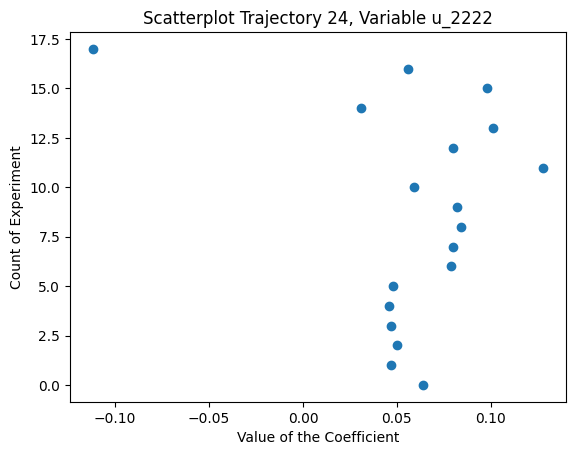

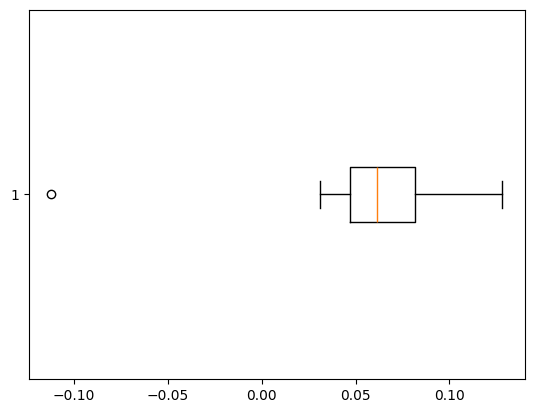

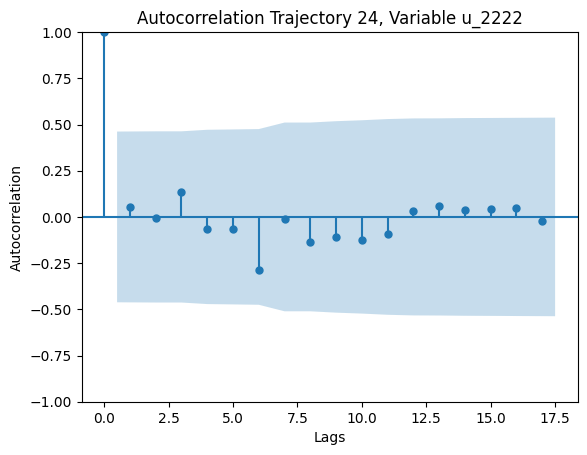

Standard deviation of Trajectory 24, Variable u_1: 0.13183944781437765
Mean of Trajectory 24, Variable u_1: 0.0013999999999999987


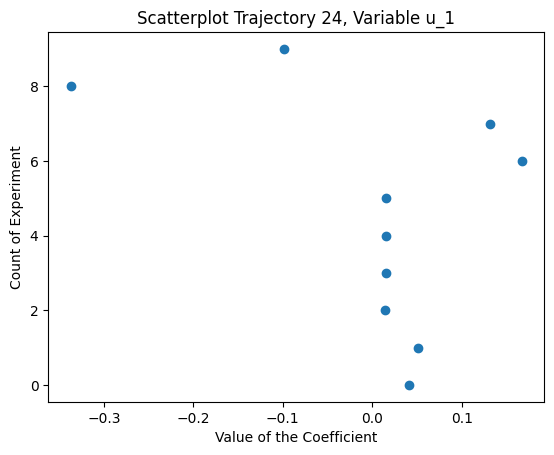

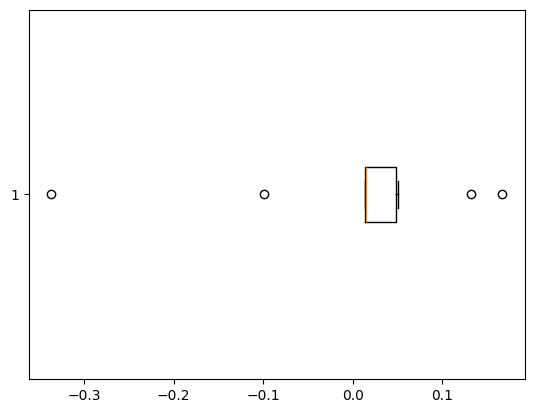

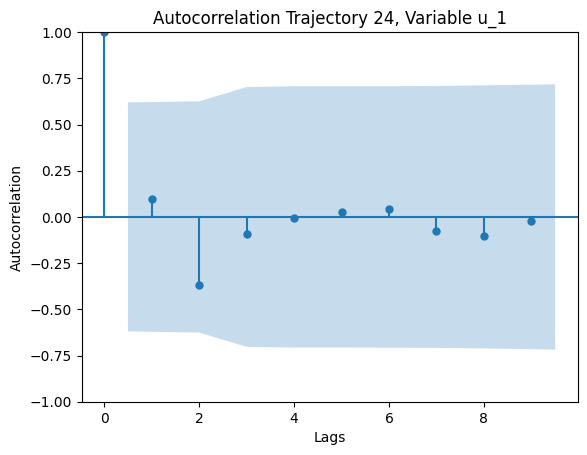

Standard deviation of Trajectory 24, Variable u_12: 0.018060661671157014
Mean of Trajectory 24, Variable u_12: 0.02775


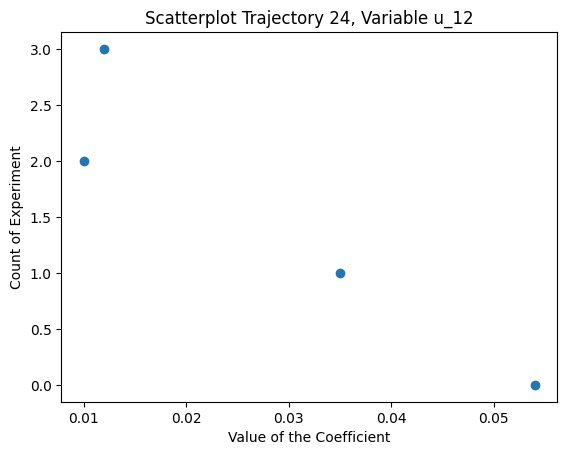

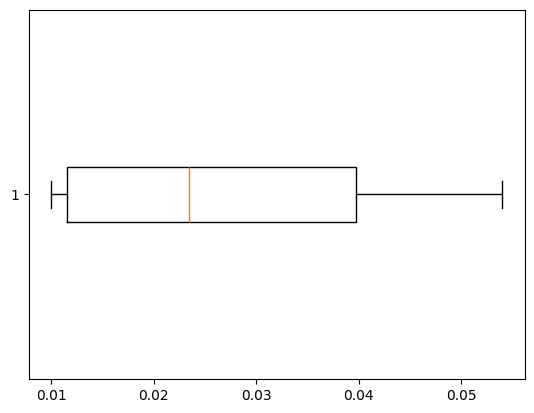

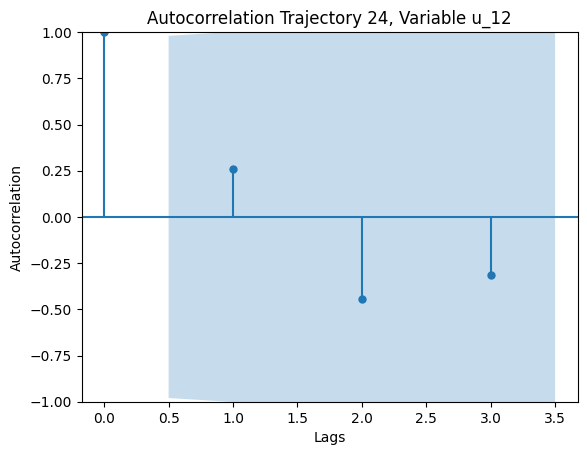

Standard deviation of Trajectory 24, Variable u_122: 0.018635556085539382
Mean of Trajectory 24, Variable u_122: 0.011222222222222222


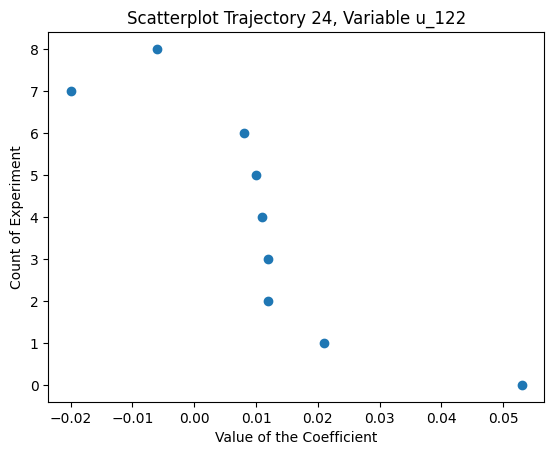

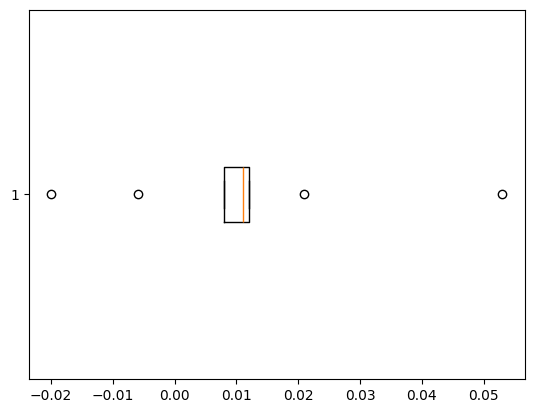

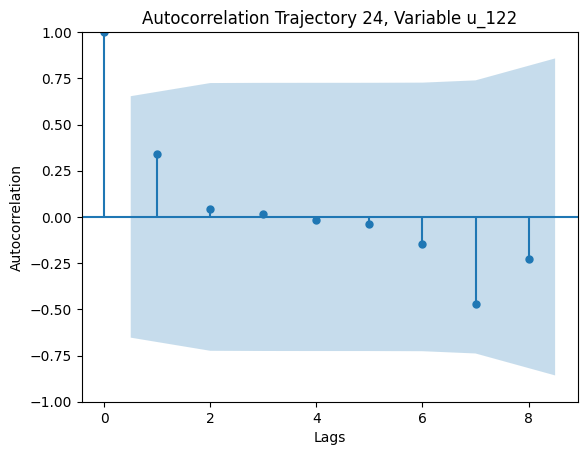

Standard deviation of Trajectory 24, Variable u_1222: 0.024458581770458853
Mean of Trajectory 24, Variable u_1222: 0.03133333333333333


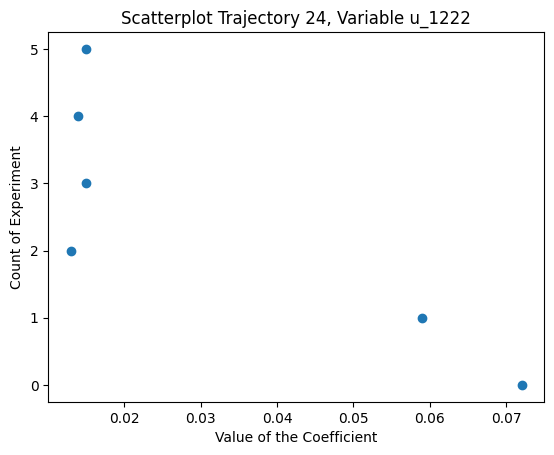

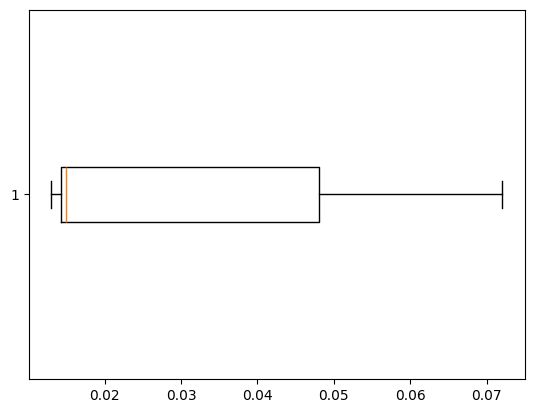

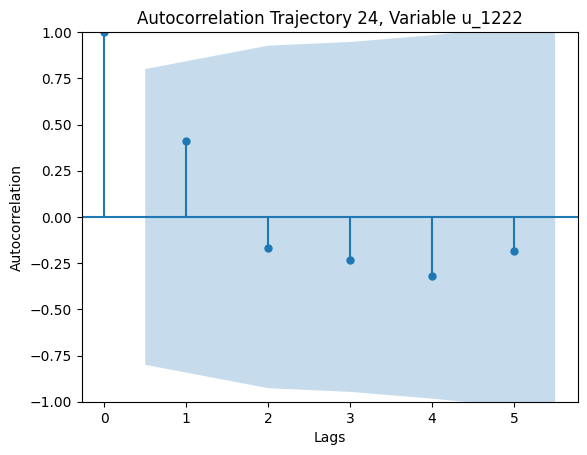

Standard deviation of Trajectory 24, Variable u_11: 0.11097043525191744
Mean of Trajectory 24, Variable u_11: 0.024249999999999997


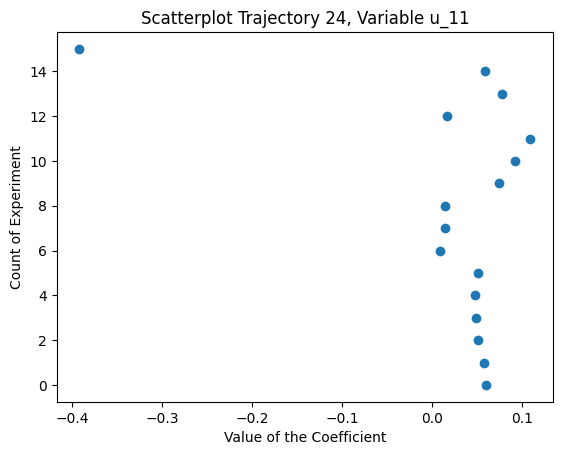

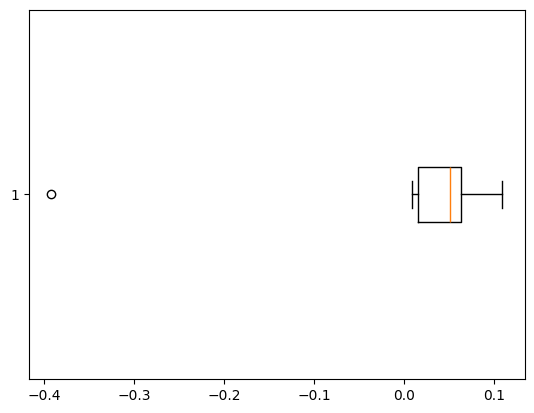

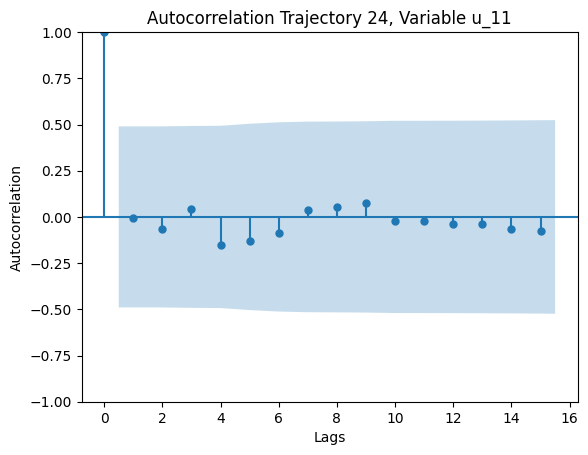

Standard deviation of Trajectory 24, Variable u_112: 0.018059900331950894
Mean of Trajectory 24, Variable u_112: 0.0208


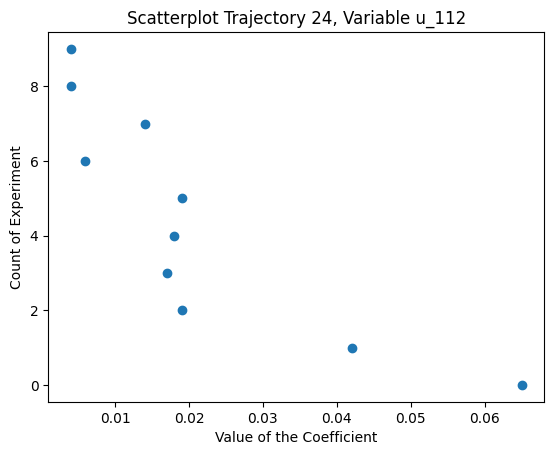

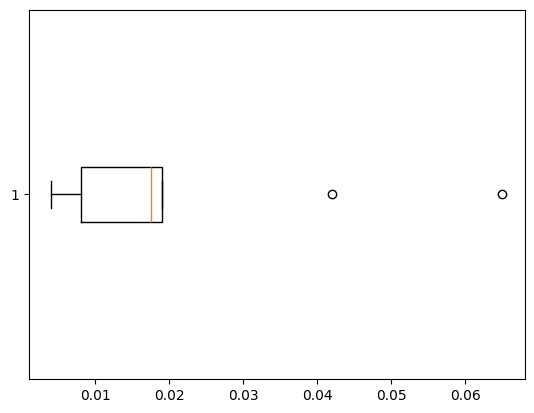

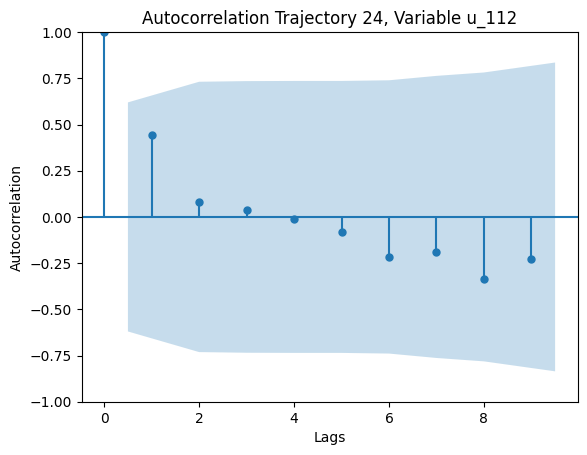

Standard deviation of Trajectory 24, Variable u_1122: 0.030809204802975942
Mean of Trajectory 24, Variable u_1122: 0.039846153846153844


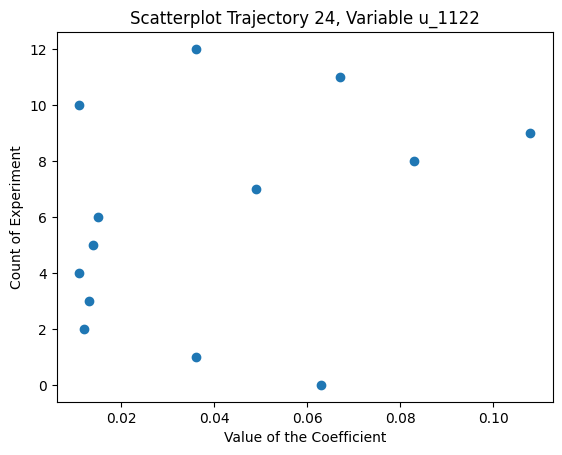

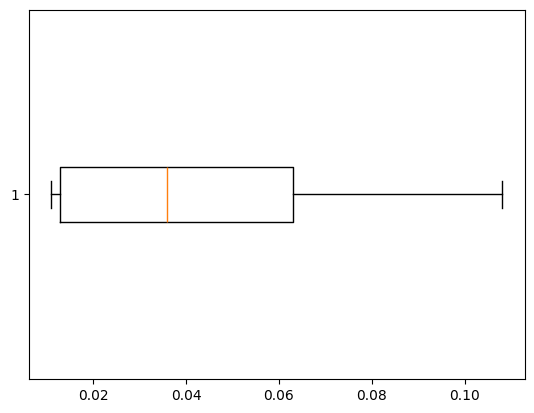

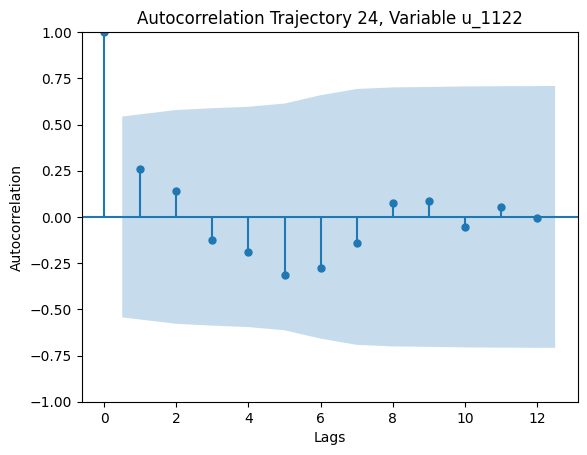

Standard deviation of Trajectory 24, Variable u_111: 0.03134086788842964
Mean of Trajectory 24, Variable u_111: 0.017499999999999998


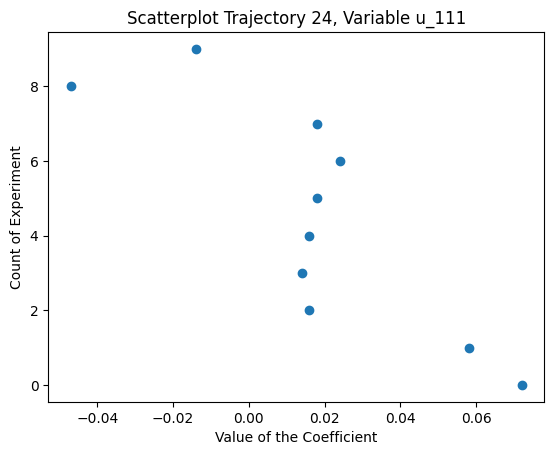

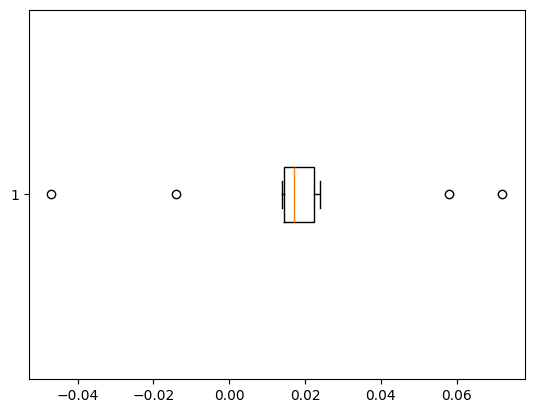

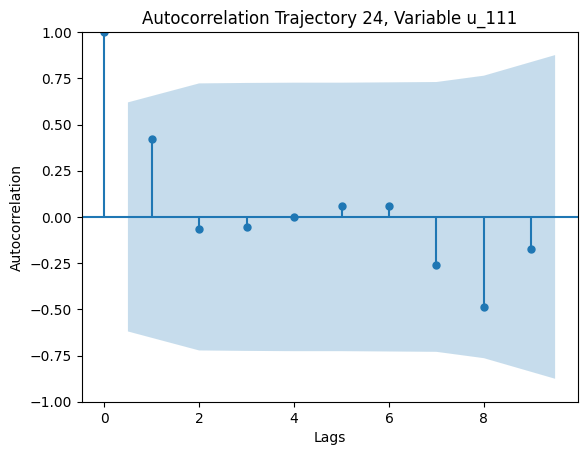

Standard deviation of Trajectory 24, Variable u_1112: 0.024143667216615344
Mean of Trajectory 24, Variable u_1112: 0.0295


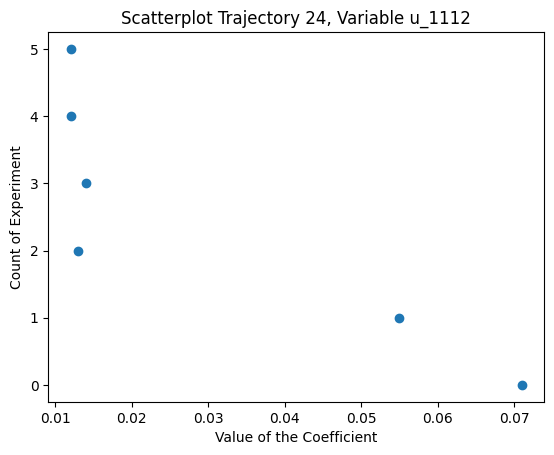

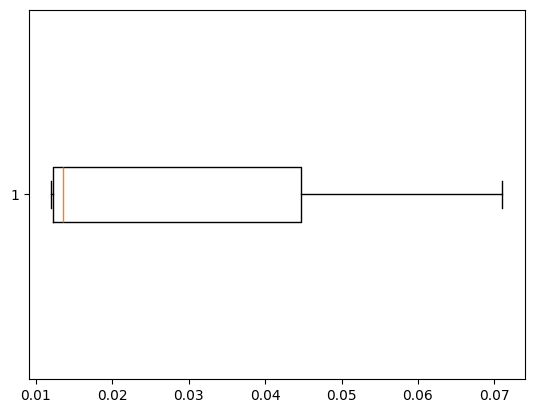

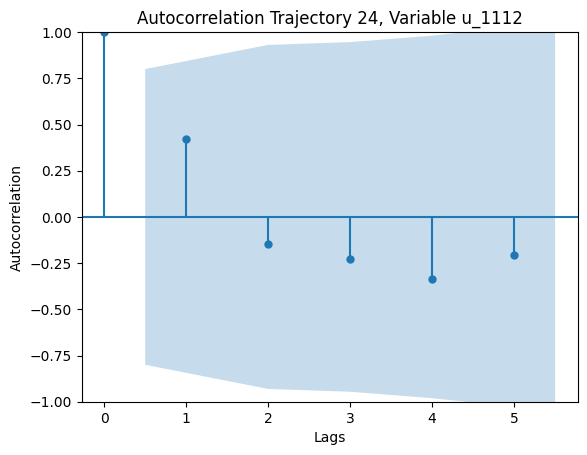

Standard deviation of Trajectory 24, Variable u_1111: 0.07140818502727042
Mean of Trajectory 24, Variable u_1111: 0.028066666666666667


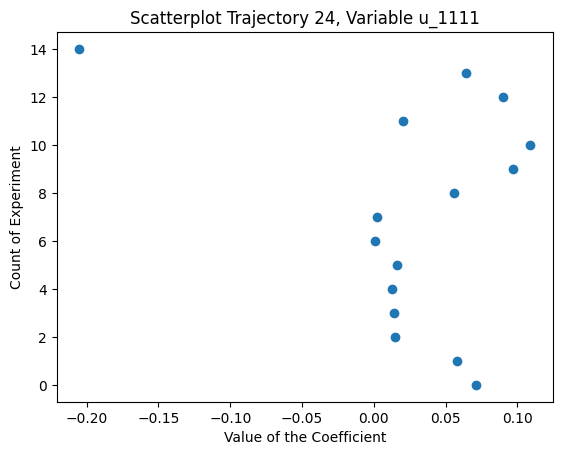

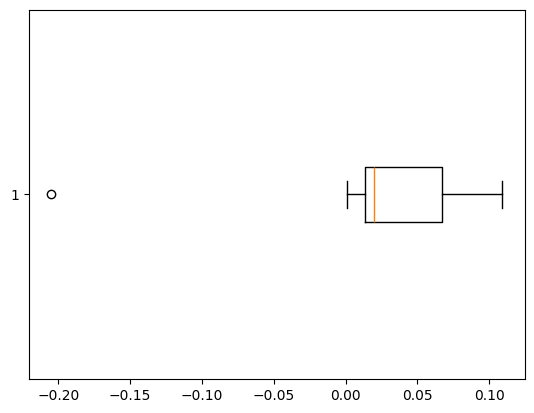

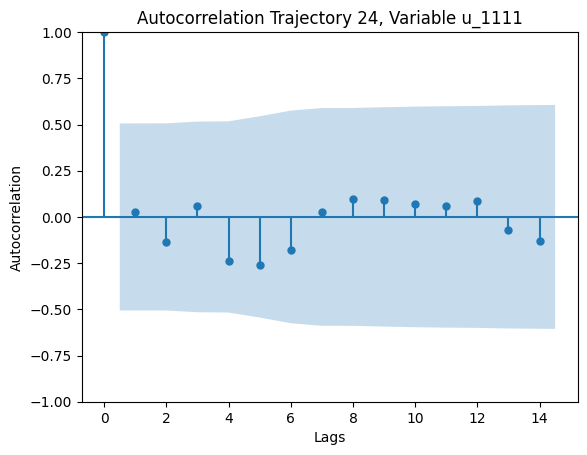

Standard deviation of Trajectory 24, Variable uuu: 0.08705553782882892
Mean of Trajectory 24, Variable uuu: 0.039


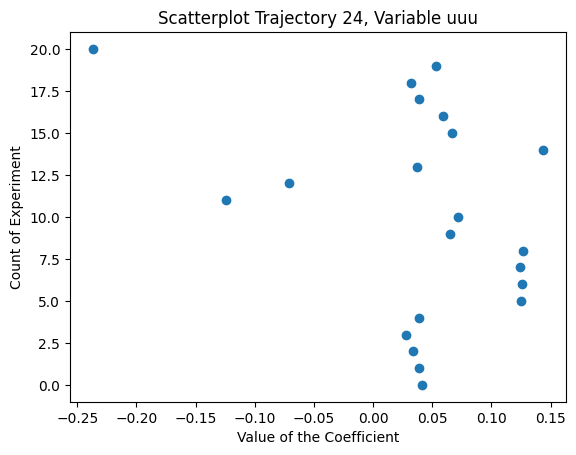

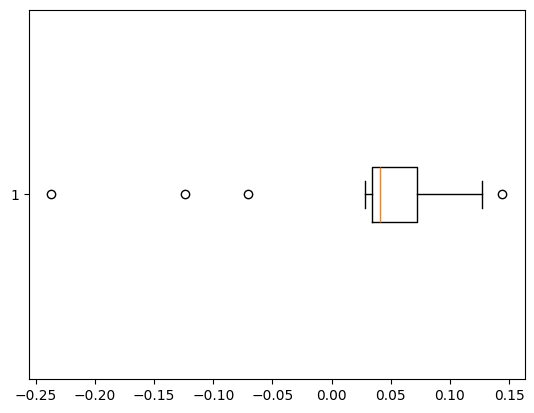

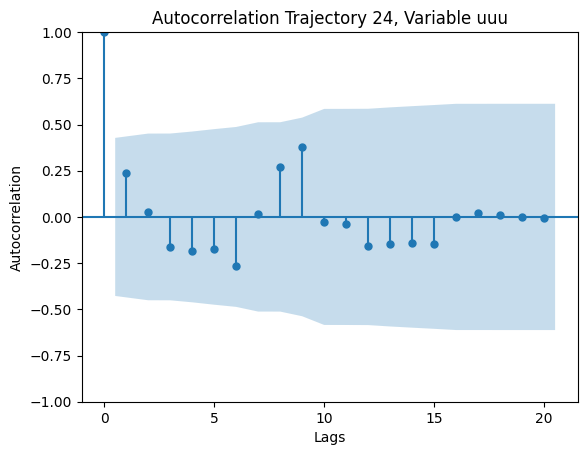

Standard deviation of Trajectory 24, Variable u_2: 0.05089332154138491
Mean of Trajectory 24, Variable u_2: 0.06484615384615385


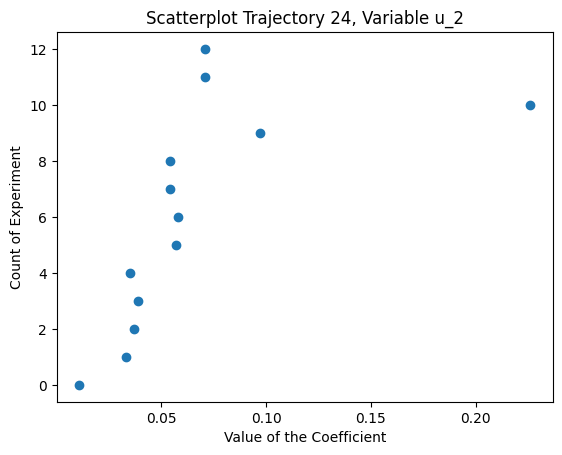

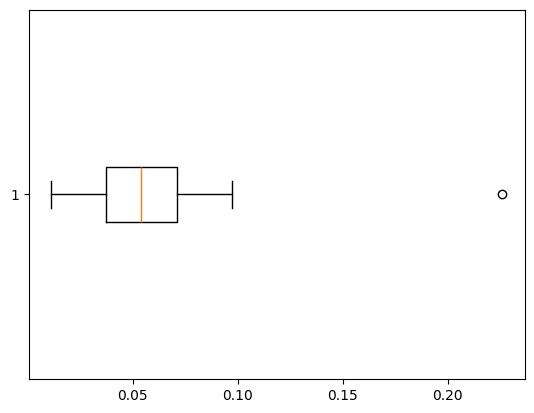

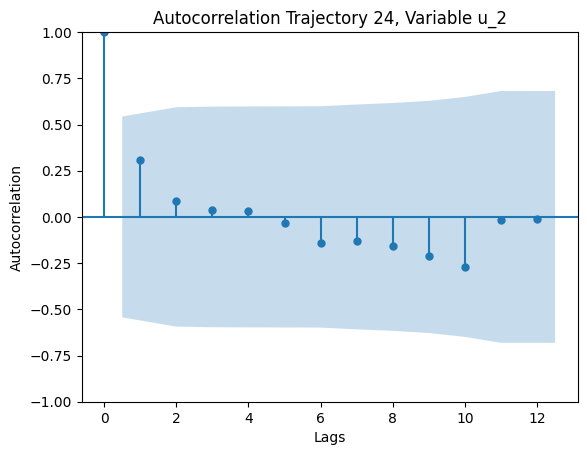

In [34]:
for trajectory in pde_dict:
    for variable in pde_dict[trajectory]:

        x = pde_dict[trajectory][variable]

        std = statistics.pstdev(x)
        mean = statistics.mean(x)
        print("Standard deviation of Trajectory " + trajectory + ", Variable " + variable + ": " + str(std))
        print("Mean of Trajectory " + trajectory + ", Variable " + variable + ": " + str(mean))

        y = np.arange(0, len(x), 1)
        plt.title("Scatterplot Trajectory " + trajectory + ", Variable " + variable)
        plt.xlabel("Value of the Coefficient")
        plt.ylabel("Count of Experiment")
        plt.scatter(x, y)
        plt.show()

        plt.boxplot(x, vert=False)
        plt.show()
        
        sm.tsa.acf(x)
        fig = tsaplots.plot_acf(x, lags=(len(x)-1))
        plt.title("Autocorrelation Trajectory " + trajectory + ", Variable " + variable)
        plt.xlabel("Lags")
        plt.ylabel("Autocorrelation")
        plt.show()

## Analyze correlations between variables

In [35]:
pde_dict_without_derivatives = {}

# Define variables and coefficients using regular expression
pattern = re.compile(r'([-+]?\s*\d*\.\d+\s*)?(\w+)(?:_(\d+))?')

with open(r"PDE.txt", 'r') as f:
    lines = f.readlines()
    # Equation for which of the trajectories?
    for line in lines:
        if line.__contains__("20:"):
            key = '20'
        elif line.__contains__("22:"):
            key = '22'
        elif line.__contains__("24:"):
            key = '24'
        else:
            # Read equation
            if '#' not in line and line.strip():
                matches = pattern.findall(line)
                # Write dictionary for each variable
                equation_dict = {}
                for coefficient, variable, exponent in matches:
                    coefficient = float(coefficient.replace(" ", "")) if coefficient else 1.0
                    exponent = int(exponent) if exponent else 1
                    variable = variable + ('_' + exponent if exponent > 1 else '')
                    if variable == 'u' or variable == 'uu' or variable == 'uuu':
                        equation_dict[variable] = [coefficient]
                if key not in pde_dict_without_derivatives:
                    pde_dict_without_derivatives[key] = equation_dict
                else:
                    dict1 = pde_dict_without_derivatives[key]
                    for key_dict2, value_dict2 in equation_dict.items():
                        if key_dict2 in dict1:
                            dict1[key_dict2].extend(value_dict2)
                        else:
                            dict1[key_dict2] = value_dict2
                    pde_dict_without_derivatives[key].update(dict1)

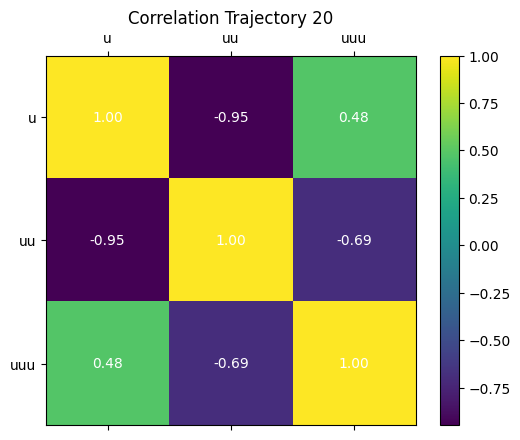

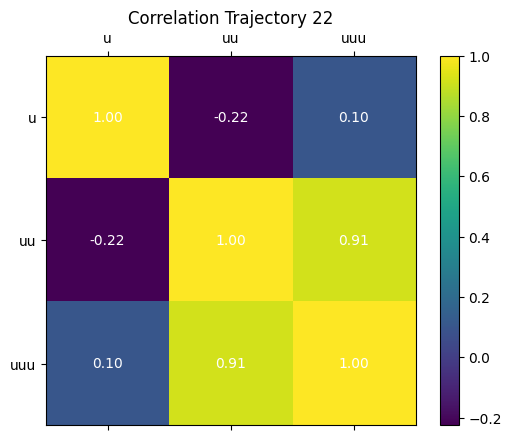

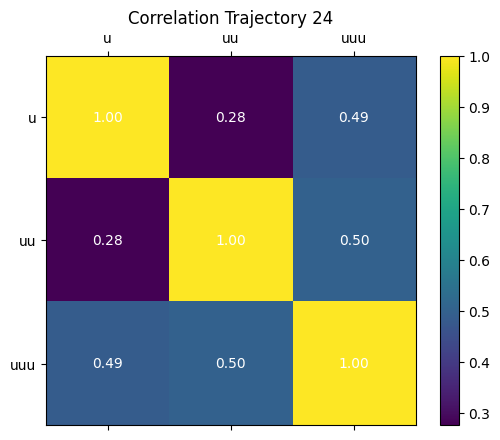

In [36]:
for trajectory in pde_dict_without_derivatives:
    df = pd.DataFrame.from_dict(pde_dict_without_derivatives[trajectory])
    fig, ax1 = plt.subplots()
    im = ax1.matshow(df.corr())
    # Set custom tick labels
    tick_labels = ['u', 'uu', 'uuu']
    ax1.set_xticks(range(len(tick_labels)))
    ax1.set_xticklabels(tick_labels)
    ax1.set_yticks(range(len(tick_labels)))
    ax1.set_yticklabels(tick_labels)
     # Display exact values in each field
    for i in range(len(tick_labels)):
        for j in range(len(tick_labels)):
            text = f'{df.corr().iloc[i, j]:.2f}'
            ax1.text(j, i, text, ha='center', va='center', color='w')
    # Legend
    fig.colorbar(im, ax=ax1)
    #Title
    ax1.set(title='Correlation Trajectory ' + trajectory)
plt.show()